# Observing Ether Value in Basic Econometrics Method

https://forum.celestia.org/t/ethereum-rollup-call-data-pricing-analysis


https://blog.celestia.org/ethereum-off-chain-data-availability-landscape/




## 🔎 Cast an eye over the "Factors".

[DataSet 2015/7/30~2022/5/12](https://docs.google.com/spreadsheets/d/1DlyoV5HBEbYAJz0tH8Ul8yE3WRAXSHeLuQhdLDgino8/edit?usp=sharing)

### Explanatory & Response Variables

| Explanatory Variables | Statement | 
| :--------: | :--------: | 
|**1. On-Chain Data**||
|**Monetary Situation**||
| Total Supply | 總發行量 |
|  Market Cap | 以太幣總市值 |
|  Daily Ether Burnt | 每日銷毀量 |
| Average Gas Price | 單位平均燃料費 |
|  Average Gas Limit | 平均交易最高燃料量 |
|  Average Transaction Fee | 平均交易手續費 |
|  Gas Used Per Day | 每日 Gas 使用量 |
|**Security 安全性**||
|  Blocks Per Day | 每日出產區塊 |
|  Average Block Size | 平均區塊大小 |
|  Average Difficulty | 平均區塊難度 |
|  Network Hash Rate | 可以衡量礦工保護網路免受攻擊的處理能力 |
| Miner Revenue | 新鑄造的以太幣和交易費用的加總，礦工收入的高低也會影響到礦工的打包意願|
| Active Nodes | 運行節點數|
|**Usage**| 觀察網路使用量可以給我們當前經濟活動的相關訊息 |
| Active Adress | 活躍地址數量|
|  Cumulative Unique Addresses | 累積地址數量 |
|  Network Utilization | |
|  Transactions Per Day | 每日交易量 |
|**Capability**| 支援智能合約的運作讓其之上的 Dapp 可以促成許多不同的產品和經濟模式。|
|DeFi TVL| 總鎖倉量 |
| Verified Contracts | 每日驗證合約數量 |
|StableCoins Value| 穩定幣總價值，暫定為 USDT、USDC、DAI 總和 |
|Sales NFT per Day | NFT 每日銷售額 |
|Number of sales NFT per Day| NFT 每日銷售量 |
|||
|**2. Off-Chain Data**|
|||
|**3. Competition & Correlation**|
| NASDAQ | 美股那斯達克指數 |
| BTC/USDT Price | 比特幣價格 |
| SOL/USDT Price | Solana 價格 |
| ADA/USDT Price | Cardano 價格 |
| BNB/USDT Price | 幣安幣價格 |
| ETC/USDT Price | 以太坊經典價格 |
|||
| **Response Variables**| **Statement** |
| ETH/USDT Price | 以太幣價格| 

### Additional Remarks

1. Speed and Scalability and ETH 2.0
    * 出塊速度為 12~14 秒、交易結算時間約為五分鐘
    * ETH 2.0 將會達到每秒 15000 筆交易，無論是  還是 Beacon Chain 的影響在我們目前單就以太坊內部分析來講，對交易來說都只是常數，所以之後我們不會納入分析。
2. 穩定幣 Stablecoins：
    * 穩定幣代表加密資產們如何和現實世界錨定的一種規則，或許我們可以使用穩定幣的發行數量來觀察現實世界使用區塊鏈的數量關係，不只如此，這也是使用者最直接衡量加密資產或服務價值的方式。同時穩定幣的使用也和鏈上產品和應用程式息息相關，對穩定幣的需求或許會直接或間接地表明使用者的習慣和需求
3. Internal governance
    * Proof-of-Stake Model 中治理代幣可能會對價格產生影響，但由於尚未實行所以目前尚不考慮這個因素
4. Competition & Correlation
    * 比特幣作為整個加密貨幣市場的主宰，其波動自然也會帶動其他貨幣的發展，雖然數據顯示從 2020 的 DeFi 爆炸性發展之後 ETH 和 BTC 的相關性就不斷下降，但我想競爭幣的價格還是有可以參考的部分
    * 這邊除了 BTC 之外我還選出了其他的主流生態系的加密貨幣來作為解釋變數，看能不能發現一些相關性。
    * 此外科技股 NASDAQ 指數也和加密貨幣市場有相關性的可能，因此也納入考量
5. Foundation Target & Regulations 
    * 實際上我們沒有辦法判斷 Ethereum Foundation 的策略和談話是利空還是利好，針對 EF 發表內容的性質分析對 Ether 的價值比較適合另外做一篇研究報告來討論。
    * 另外一個研究方向是關注 SEC 的談話，如果該月出現負面報導就訂為 1，出現正面報導、無相關報導，或者無法定義的報導都定義為 0。我相信這個相關性也很高只是資料蒐集的負擔比較大，可能需要花一點時間做文字探勘所以也省略。


備註：請注意這裡的分析將不會考慮穩定幣的脫鉤。



## Data Preprocessing

In [1]:
!gdown --id '1custw2QC7Q27eW6y40ZzP5FVmHpJ58ey'

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1custw2QC7Q27eW6y40ZzP5FVmHpJ58ey
To: /content/DATA.csv
100% 579k/579k [00:00<00:00, 122MB/s]


In [2]:
''' -------------------------- Import libraries -------------------------- '''
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
import statsmodels.api as sm
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import warnings
from itertools import product  
from tqdm import tqdm_notebook
warnings.filterwarnings('ignore')

df = pd.read_csv("DATA.csv")
print(df.columns)

Index(['Date(UTC)', 'UnixTimeStamp', 'ETH/USDT', 'EtherSupply',
       'MarketCap(USD)', 'Daily Ether Burnt(ETH)', 'Gas Limit',
       'Gas Price(Wei)', 'Gas Used Per Day', 'Average Txn Fee (USD)',
       'Blocks Per Day', 'Average Block Size(Bytes)', 'BlockDifficulty',
       'Hash Rate(GH/S)', 'Active Nodes', 'Miner Revenue', 'Active Adress',
       'Cumulative Unique Addresses', 'Network Utilization',
       'TransactionsCount Per Day', 'DeFi_TVL', 'Verified Contracts',
       'StableCoins Value', 'Sales NFT per Day', 'Number of sales NFT per Day',
       'NASDAQ', 'BTC/USDT', 'BNB/USDT ', 'SOL/USDT', 'ADA/USDT', 'ETC/USDT'],
      dtype='object')


## EDA



### Response Variable

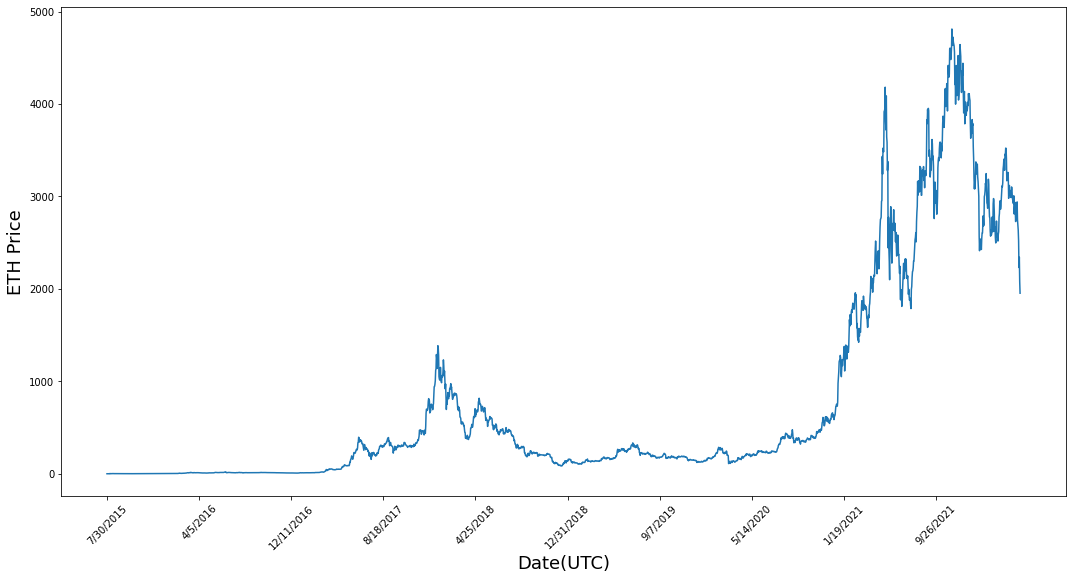

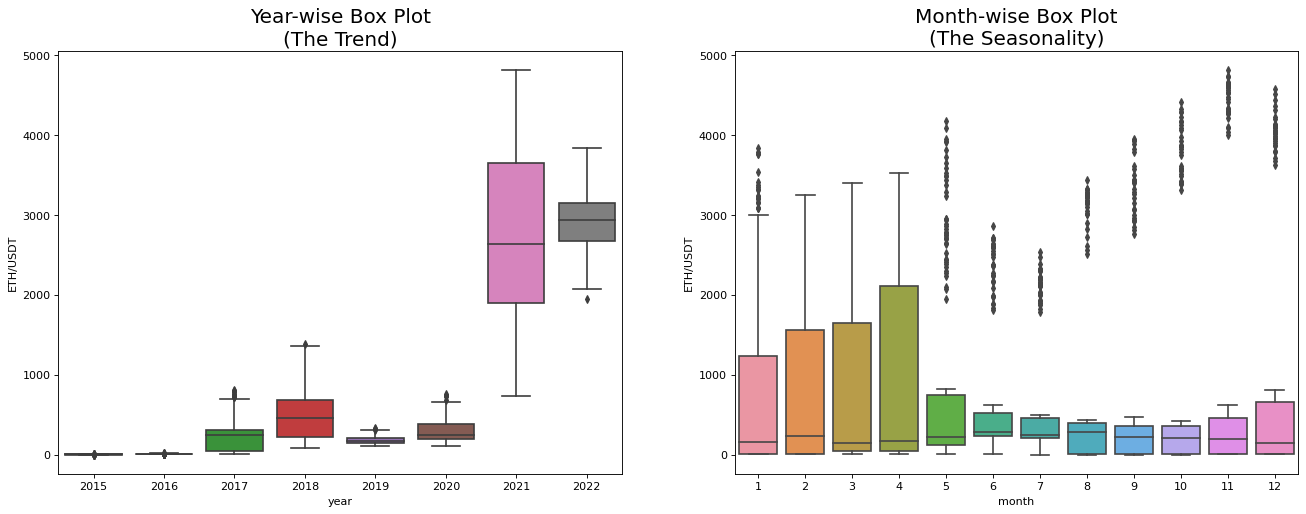

In [3]:
''' -------------------------- EDA(Exploratory data analysis) -------------------------- '''
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),df["ETH/USDT"])
plt.xticks(range(0,df.shape[0],250),df['Date(UTC)'].loc[::250],rotation=45)
plt.xlabel('Date(UTC)',fontsize=18)
plt.ylabel('ETH Price',fontsize=18)
plt.show()

# Prepare data
df['year'] = [(d.split("/"))[2] for d in df["Date(UTC)"]]
years = df['year'].unique()
df['month'] = [int((d.split("/"))[0]) for d in df["Date(UTC)"]]

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='ETH/USDT', data=df, ax=axes[0])
sns.boxplot(x='month', y='ETH/USDT', data=df.loc[~df.year.isin([2015, 2022]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

### cut point 要決定

### Explanatory Variable

比較特別的是 Explanatory Variables 我有做正規化來讓 Ploting 的樣子更好觀察。畢竟觀察絕對距離沒什麼意義，使用相對距離來呈現趨勢和相關性我自己覺得更為合適！

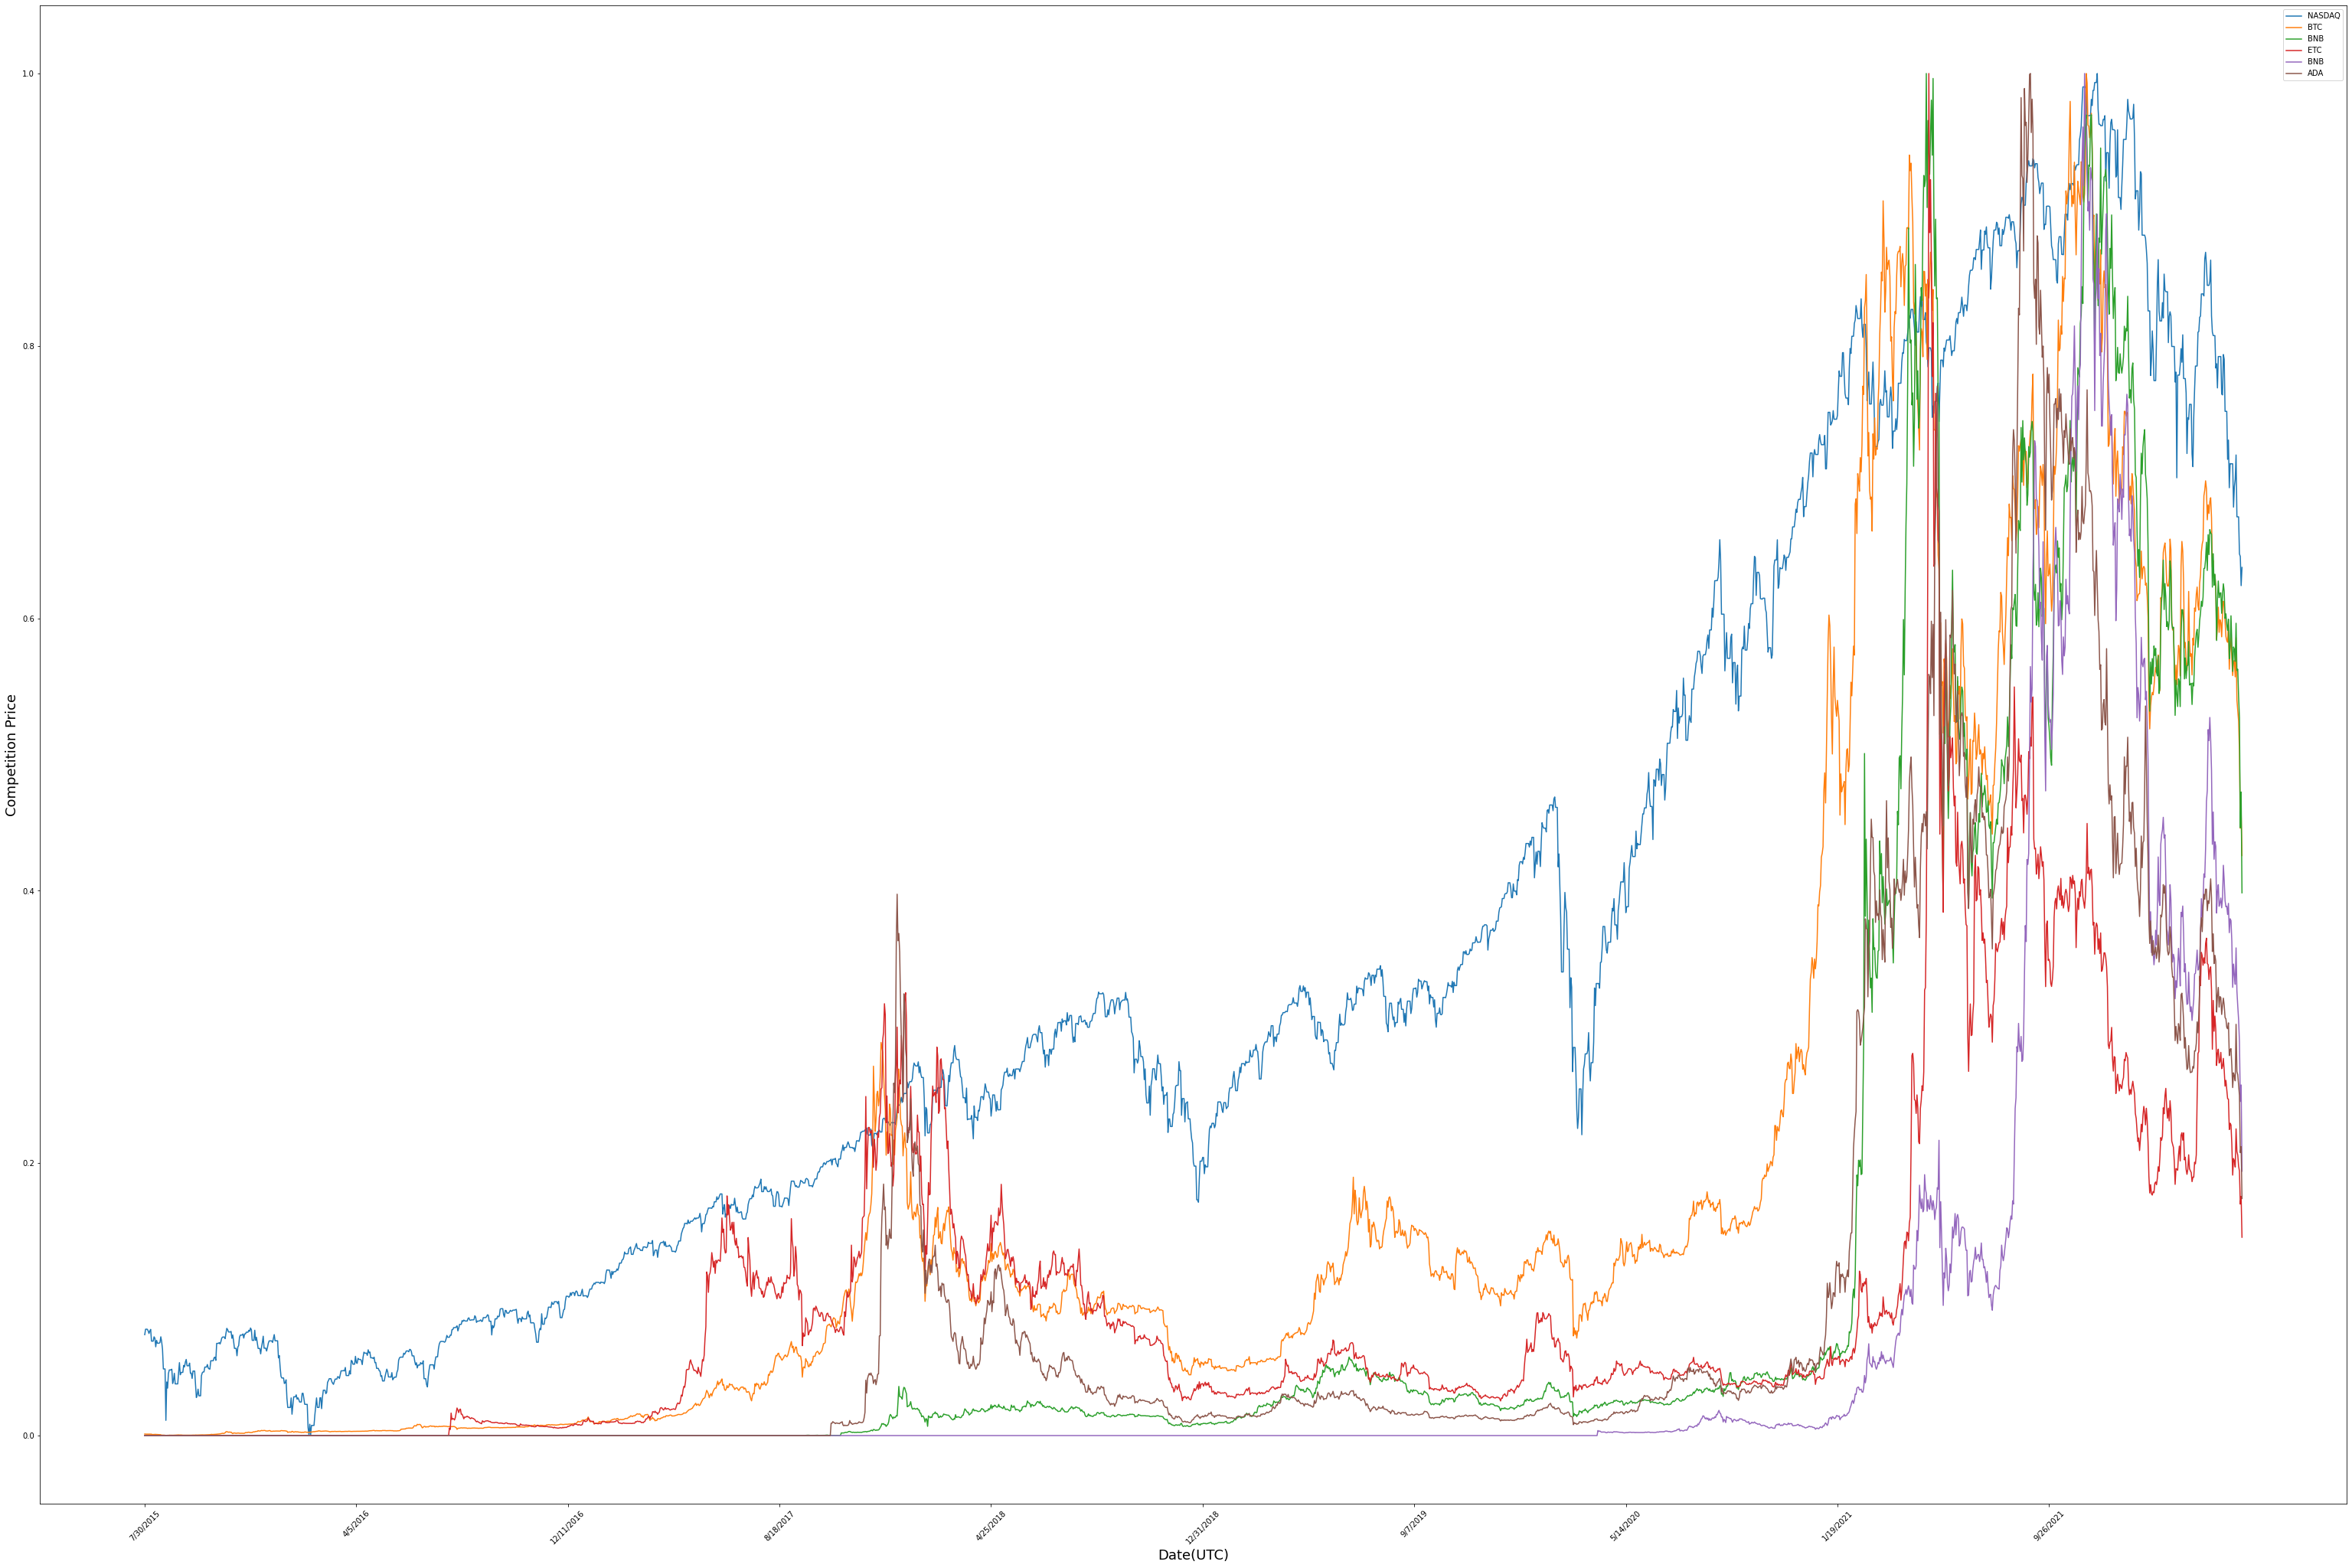

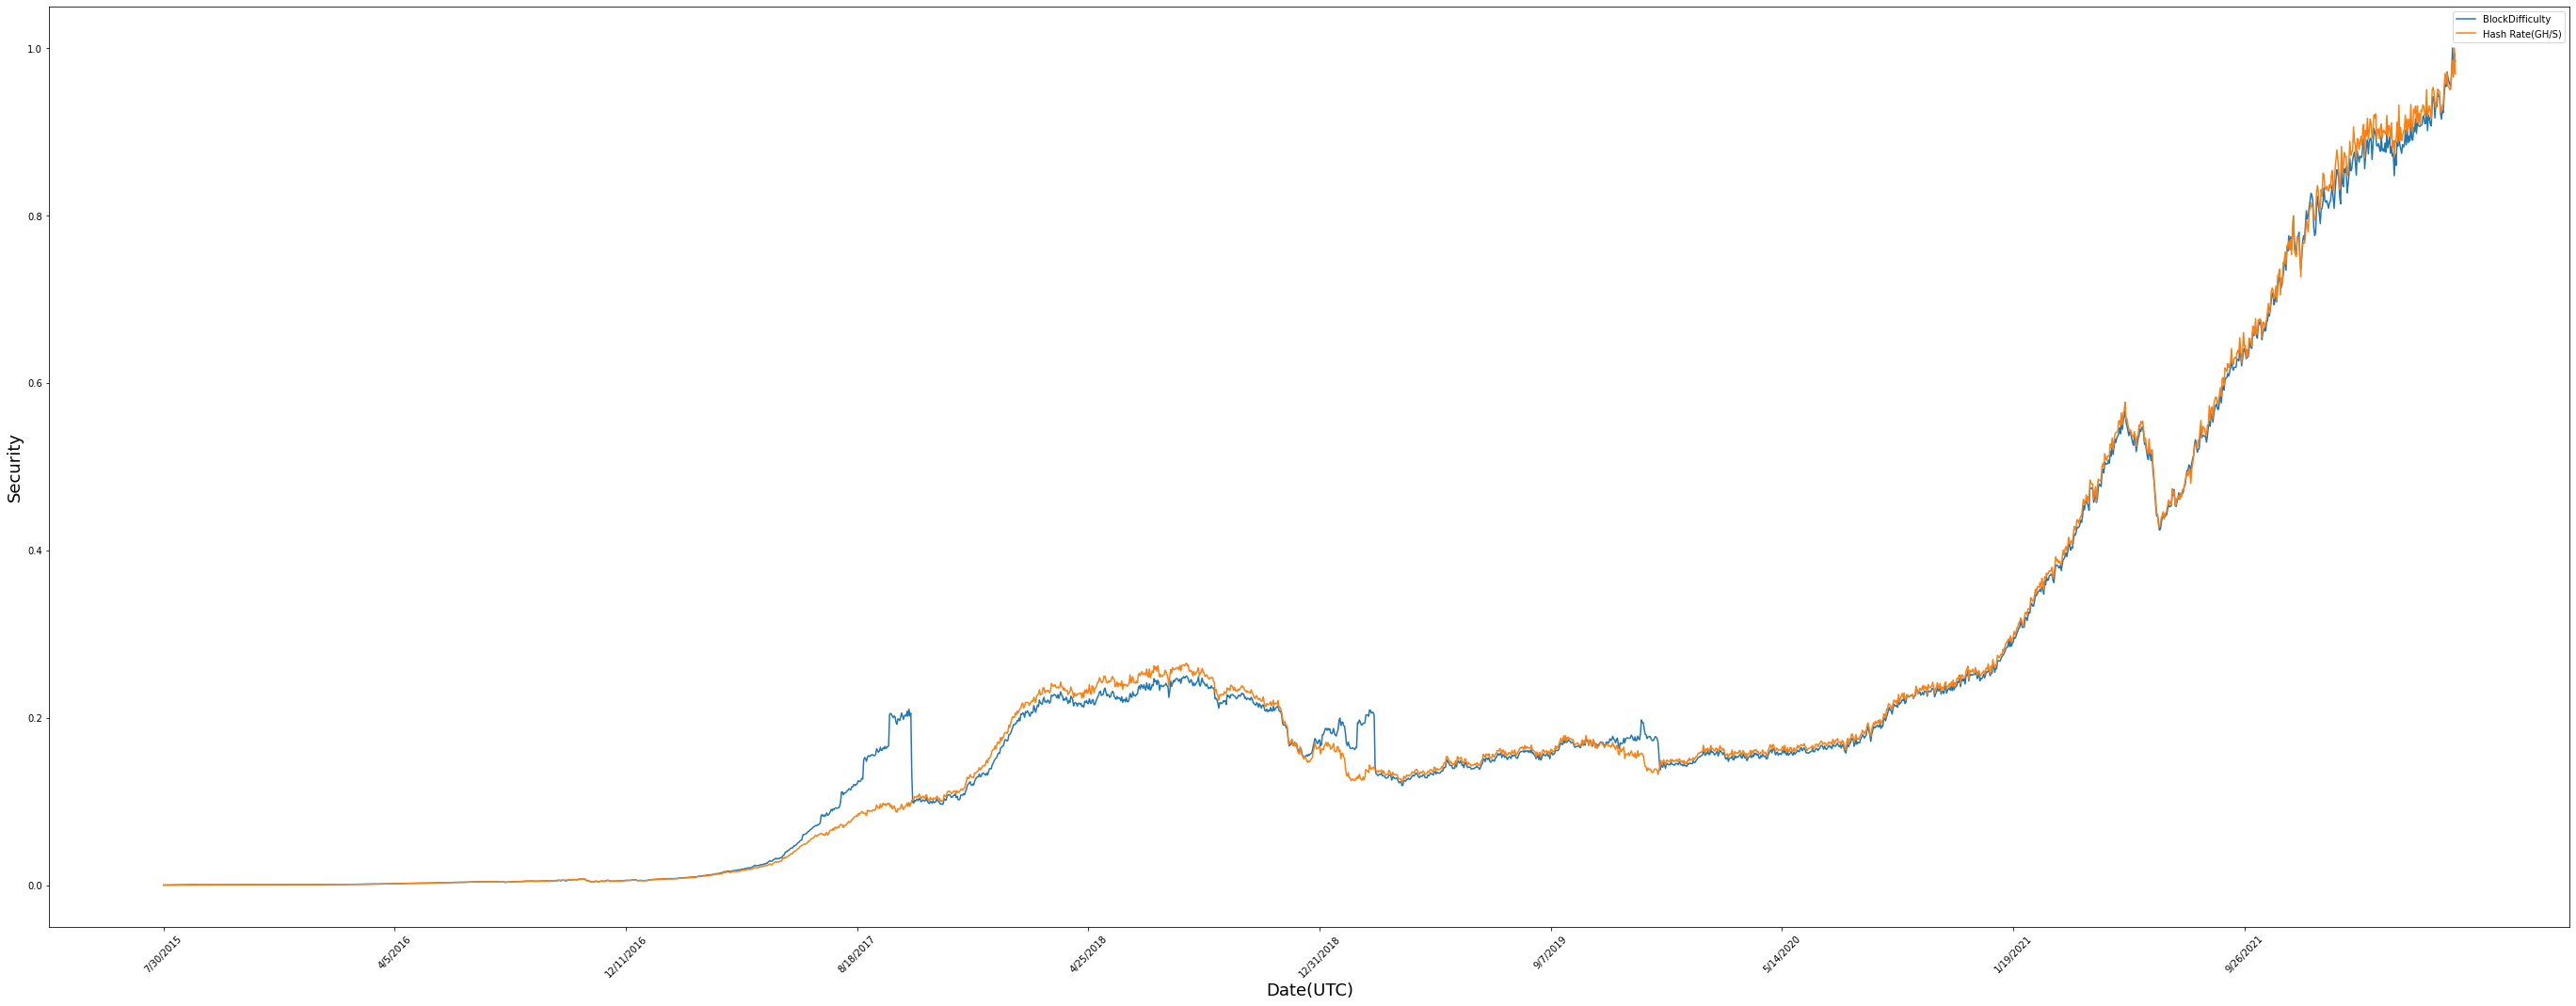

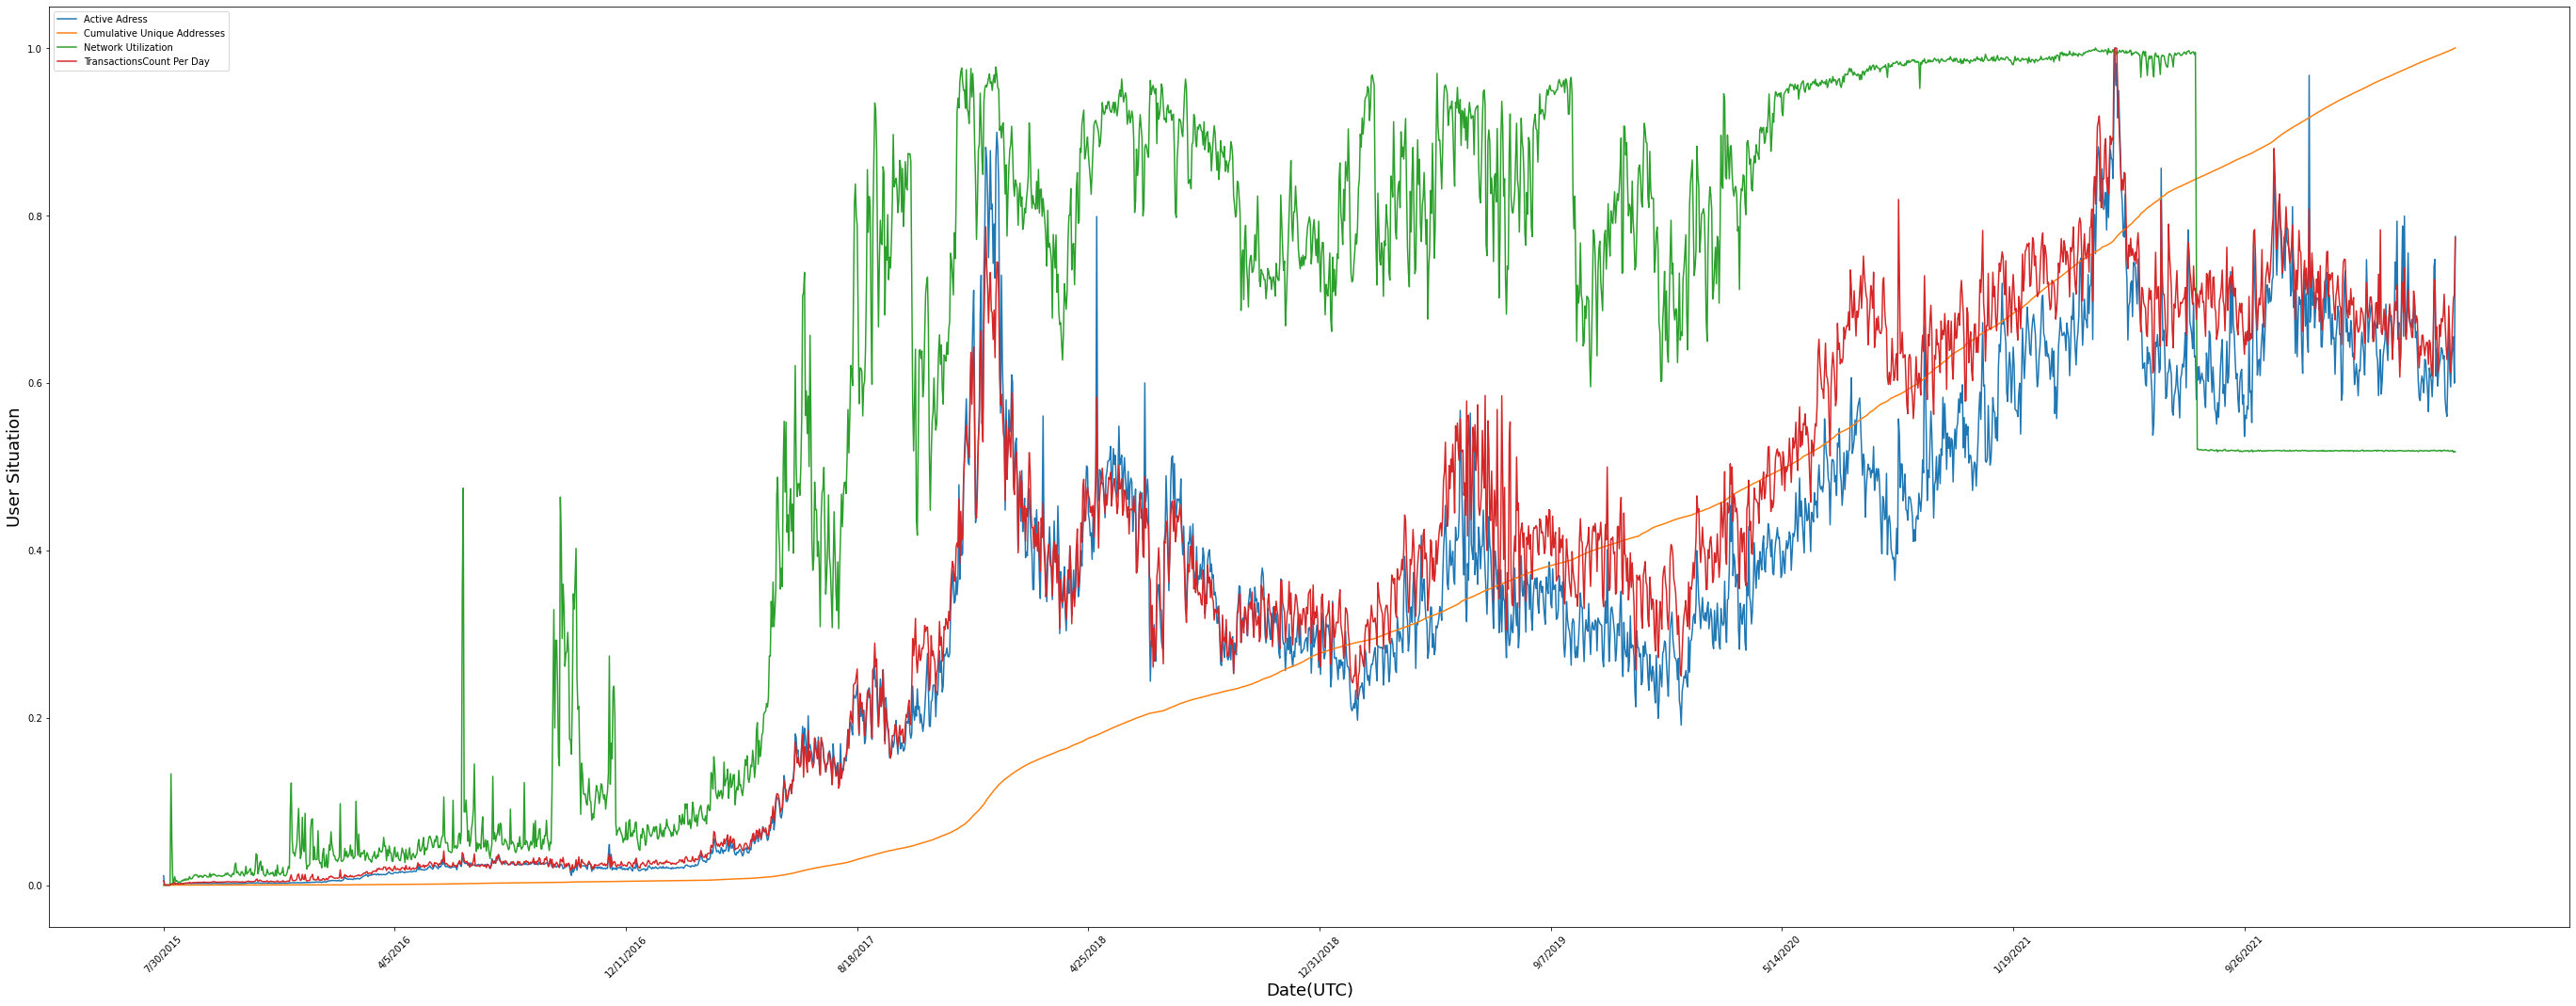

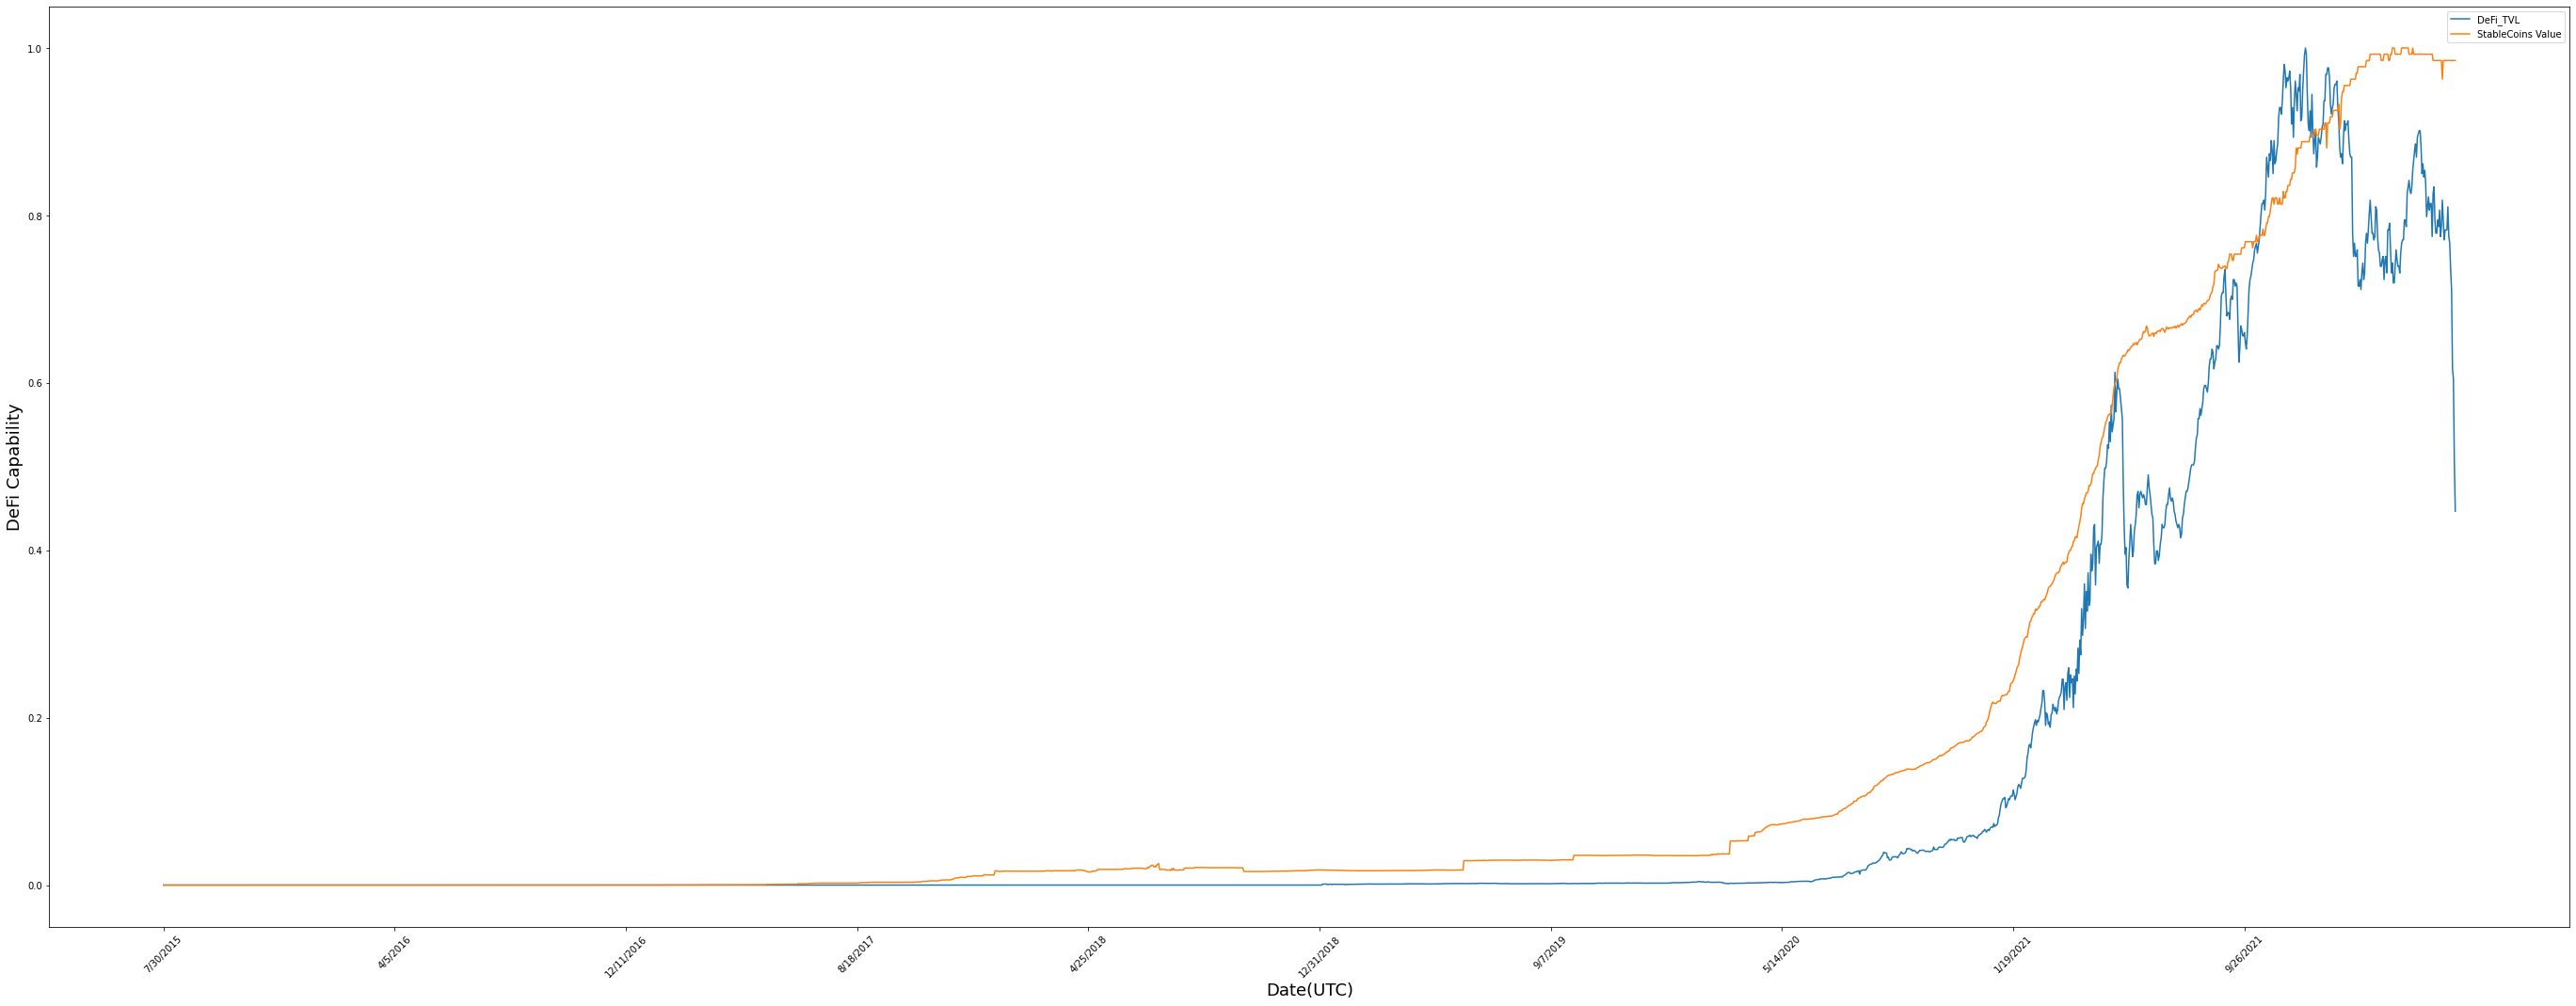

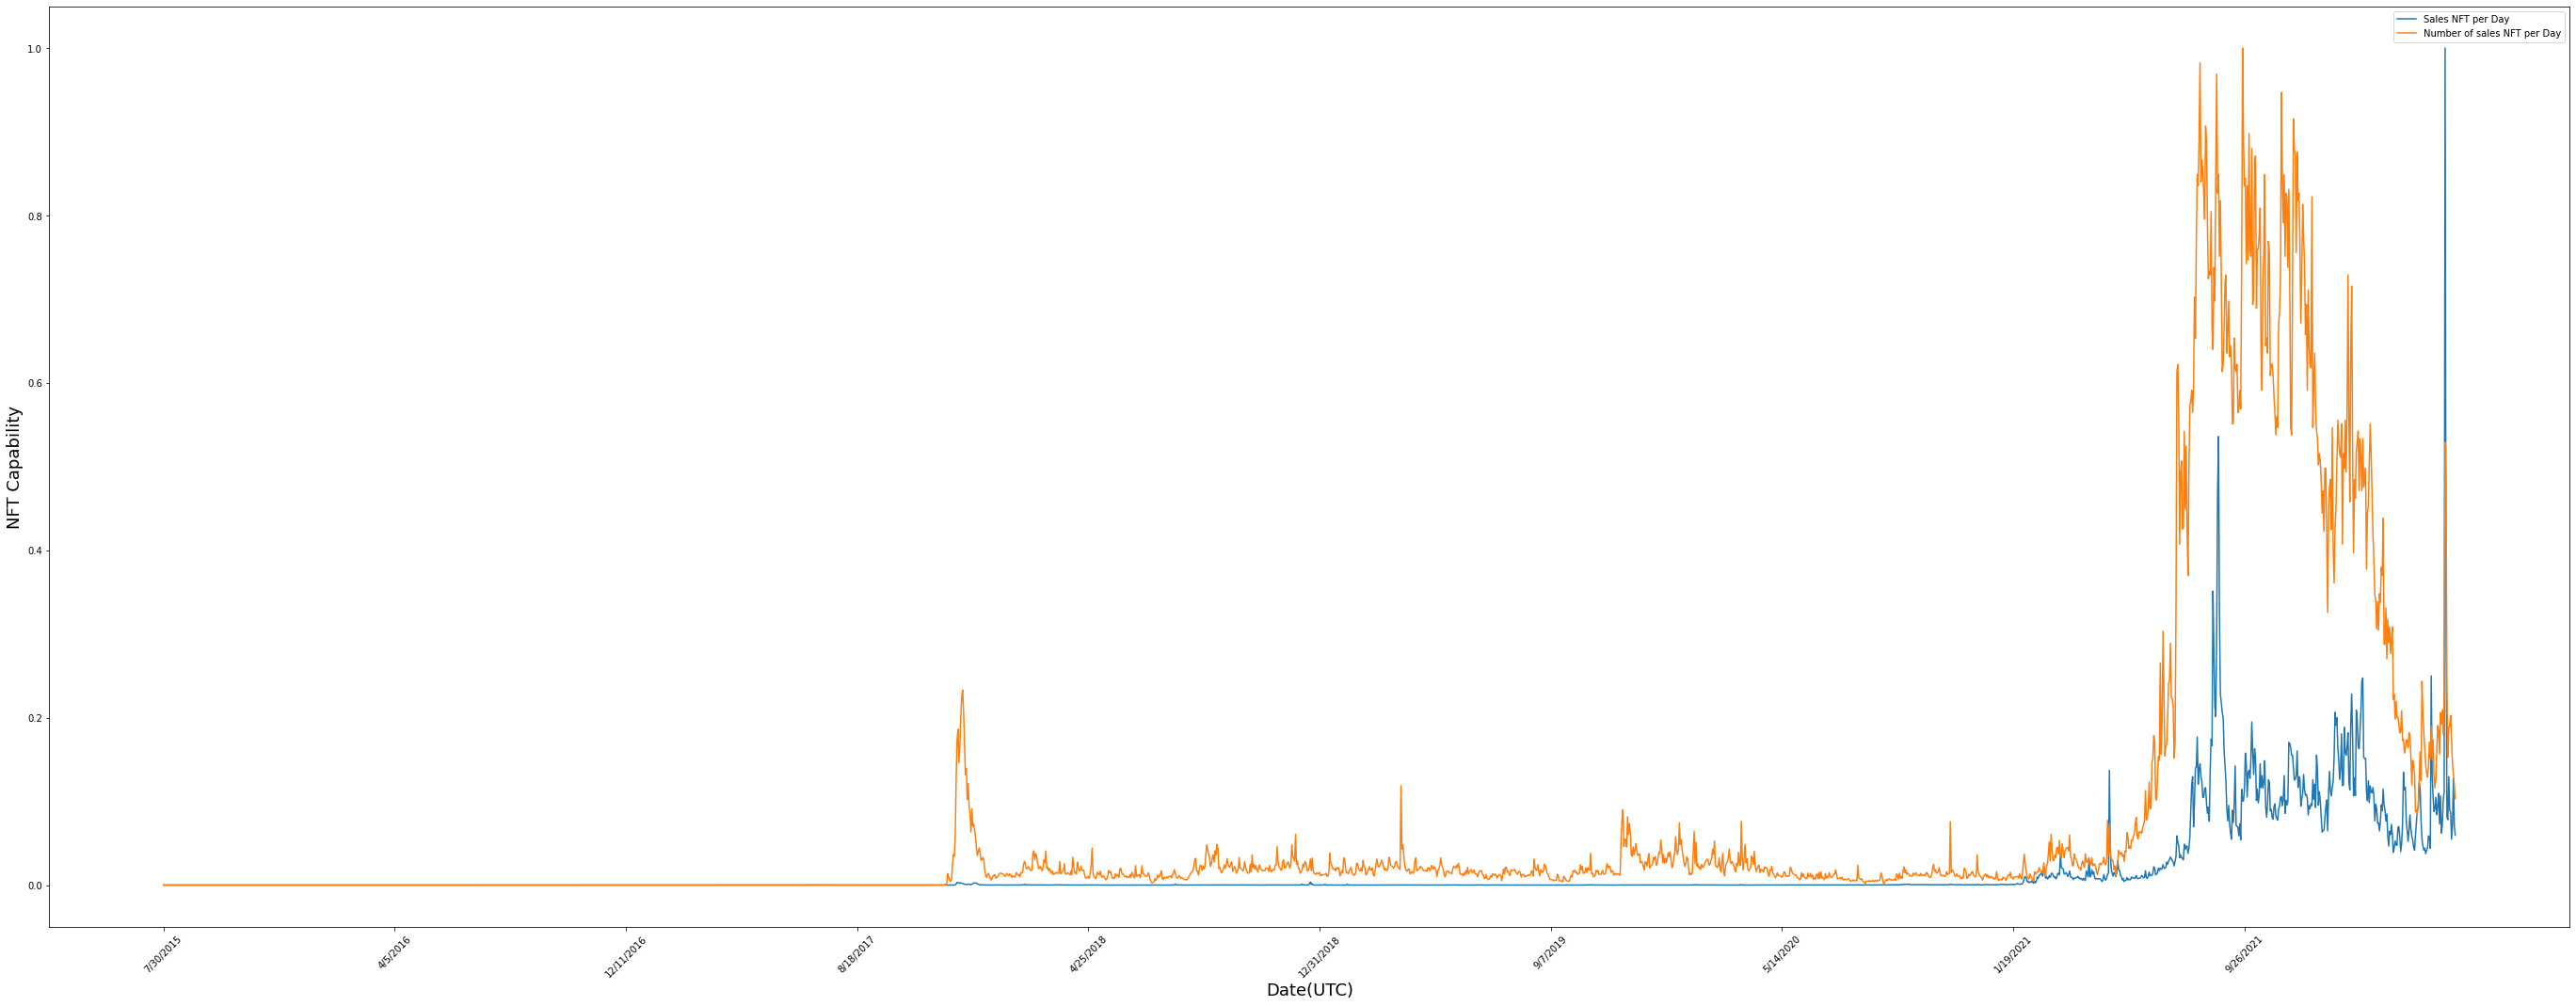

In [4]:
''' -------------------------- EDA(Exploratory data analysis) -------------------------- '''
'''
- Visualize distribution and descriptions
'''
for i in range(len(df["NASDAQ"])):
  if type(df["NASDAQ"][i]) is str and "," in df["NASDAQ"][i]:
    newstr = df["NASDAQ"][i].replace(",", "")
    df["NASDAQ"][i] = float(newstr)
  else:
    df["NASDAQ"][i] = float(df["NASDAQ"][i])
  
def normalized_df(data):
  return (data-data.min())/(data.max()-data.min())

plt.figure(figsize = (54,36))
plt.plot(range(df.shape[0]), normalized_df(df["NASDAQ"]), label="NASDAQ")
plt.plot(range(df.shape[0]), normalized_df(df["BTC/USDT"]), label="BTC")
plt.plot(range(df.shape[0]), normalized_df(df["BNB/USDT "]), label="BNB")
plt.plot(range(df.shape[0]), normalized_df(df["ETC/USDT"]), label="ETC")
plt.plot(range(df.shape[0]), normalized_df(df["SOL/USDT"]), label="BNB")
plt.plot(range(df.shape[0]), normalized_df(df["ADA/USDT"]), label="ADA")
plt.xticks(range(0,df.shape[0],250),df['Date(UTC)'].loc[::250],rotation=45)
plt.xlabel('Date(UTC)',fontsize=18)
plt.ylabel('Competition Price',fontsize=18)
plt.legend()
plt.show()

plt.figure(figsize = (48,18))
plt.plot(range(df.shape[0]), normalized_df(df['BlockDifficulty']), label="BlockDifficulty")
plt.plot(range(df.shape[0]), normalized_df(df["Hash Rate(GH/S)"]), label="Hash Rate(GH/S)")
plt.xticks(range(0,df.shape[0],250),df['Date(UTC)'].loc[::250],rotation=45)
plt.xlabel('Date(UTC)',fontsize=18)
plt.ylabel('Security',fontsize=18)
plt.legend()
plt.show()

plt.figure(figsize = (48,18))
plt.plot(range(df.shape[0]), normalized_df(df['Active Adress']), label="Active Adress")
plt.plot(range(df.shape[0]), normalized_df(df["Cumulative Unique Addresses"]), label="Cumulative Unique Addresses")
plt.plot(range(df.shape[0]), normalized_df(df['Network Utilization']), label="Network Utilization")
plt.plot(range(df.shape[0]), normalized_df(df["TransactionsCount Per Day"]), label="TransactionsCount Per Day")
plt.xticks(range(0,df.shape[0],250),df['Date(UTC)'].loc[::250],rotation=45)
plt.xlabel('Date(UTC)',fontsize=18)
plt.ylabel('User Situation',fontsize=18)
plt.legend()
plt.show()

plt.figure(figsize = (48,18))
plt.plot(range(df.shape[0]), normalized_df(df['DeFi_TVL']), label="DeFi_TVL")
plt.plot(range(df.shape[0]), normalized_df(df["StableCoins Value"]), label="StableCoins Value")
plt.xticks(range(0,df.shape[0],250),df['Date(UTC)'].loc[::250],rotation=45)
plt.xlabel('Date(UTC)',fontsize=18)
plt.ylabel('DeFi Capability',fontsize=18)
plt.legend()
plt.show()


plt.figure(figsize = (48,18))
plt.plot(range(df.shape[0]), normalized_df(df["Sales NFT per Day"]), label="Sales NFT per Day")
plt.plot(range(df.shape[0]), normalized_df(df["Number of sales NFT per Day"]), label="Number of sales NFT per Day")
plt.xticks(range(0,df.shape[0],250),df['Date(UTC)'].loc[::250],rotation=45)
plt.xlabel('Date(UTC)',fontsize=18)
plt.ylabel('NFT Capability',fontsize=18)
plt.legend()
plt.show()

### Construct the Model with lag dependent variables 


In [5]:
### lag 幾天要選擇一下

df['ETH_lag1'] = np.log(df['ETH/USDT']).shift(1).fillna(0)
df['ETH_lag10'] = np.log(df['ETH/USDT']).shift(10).fillna(0)
df['ETH_lag20'] = np.log(df['ETH/USDT']).shift(20).fillna(0)
df['ETH_lag30'] = np.log(df['ETH/USDT']).shift(30).fillna(0)

df['ETH_lag1'][np.isneginf(df['ETH_lag1'])] = 0
df['ETH_lag10'][np.isneginf(df['ETH_lag10'])] = 0
df['ETH_lag20'][np.isneginf(df['ETH_lag20'])] = 0
df['ETH_lag30'][np.isneginf(df['ETH_lag30'])] = 0

df0 = df.iloc[:1900,:]
df0 = df0.reset_index(drop=True)

df = df.iloc[1900:,:]
df = df.reset_index(drop=True)

X = df[['ETH_lag1', 'ETH_lag10', 'ETH_lag20', 'ETH_lag30', 'EtherSupply', 'Daily Ether Burnt(ETH)', 'Gas Limit',
       'Gas Price(Wei)', 'Gas Used Per Day', 'Average Txn Fee (USD)',
       'Blocks Per Day', 'Average Block Size(Bytes)', 'BlockDifficulty',
       'Hash Rate(GH/S)', 'Cumulative Unique Addresses', 'Network Utilization',
       'TransactionsCount Per Day', 'DeFi_TVL', 'Verified Contracts',
       'StableCoins Value', 'Sales NFT per Day', 'Number of sales NFT per Day',
        'NASDAQ', 'BTC/USDT', 'BNB/USDT ', 'SOL/USDT', 'ADA/USDT', 'ETC/USDT']]
Y = df['ETH/USDT']


print(X.describe())
print(Y.describe())

         ETH_lag1   ETH_lag10   ETH_lag20   ETH_lag30   EtherSupply  \
count  579.000000  579.000000  579.000000  579.000000  5.790000e+02   
mean     7.648230    7.617441    7.581039    7.544956  1.168618e+08   
std      0.676576    0.711312    0.745873    0.773832  2.286165e+06   
min      5.901485    5.831442    5.768915    5.768915  1.130000e+08   
25%      7.481051    7.429161    7.365631    7.268426  1.150000e+08   
50%      7.869906    7.864458    7.846813    7.827919  1.170000e+08   
75%      8.099091    8.099091    8.099091    8.099091  1.190000e+08   
max      8.478654    8.478654    8.478654    8.478654  1.210000e+08   

       Daily Ether Burnt(ETH)     Gas Limit  Gas Price(Wei)  Gas Used Per Day  \
count              579.000000  5.790000e+02    5.790000e+02      5.790000e+02   
mean              4013.806152  2.143445e+07    9.516852e+10      9.143593e+10   
std               5574.726773  8.364990e+06    5.669891e+10      8.810733e+09   
min                  0.000000  1.246

### TS'2 No Perfect Multicollinearity

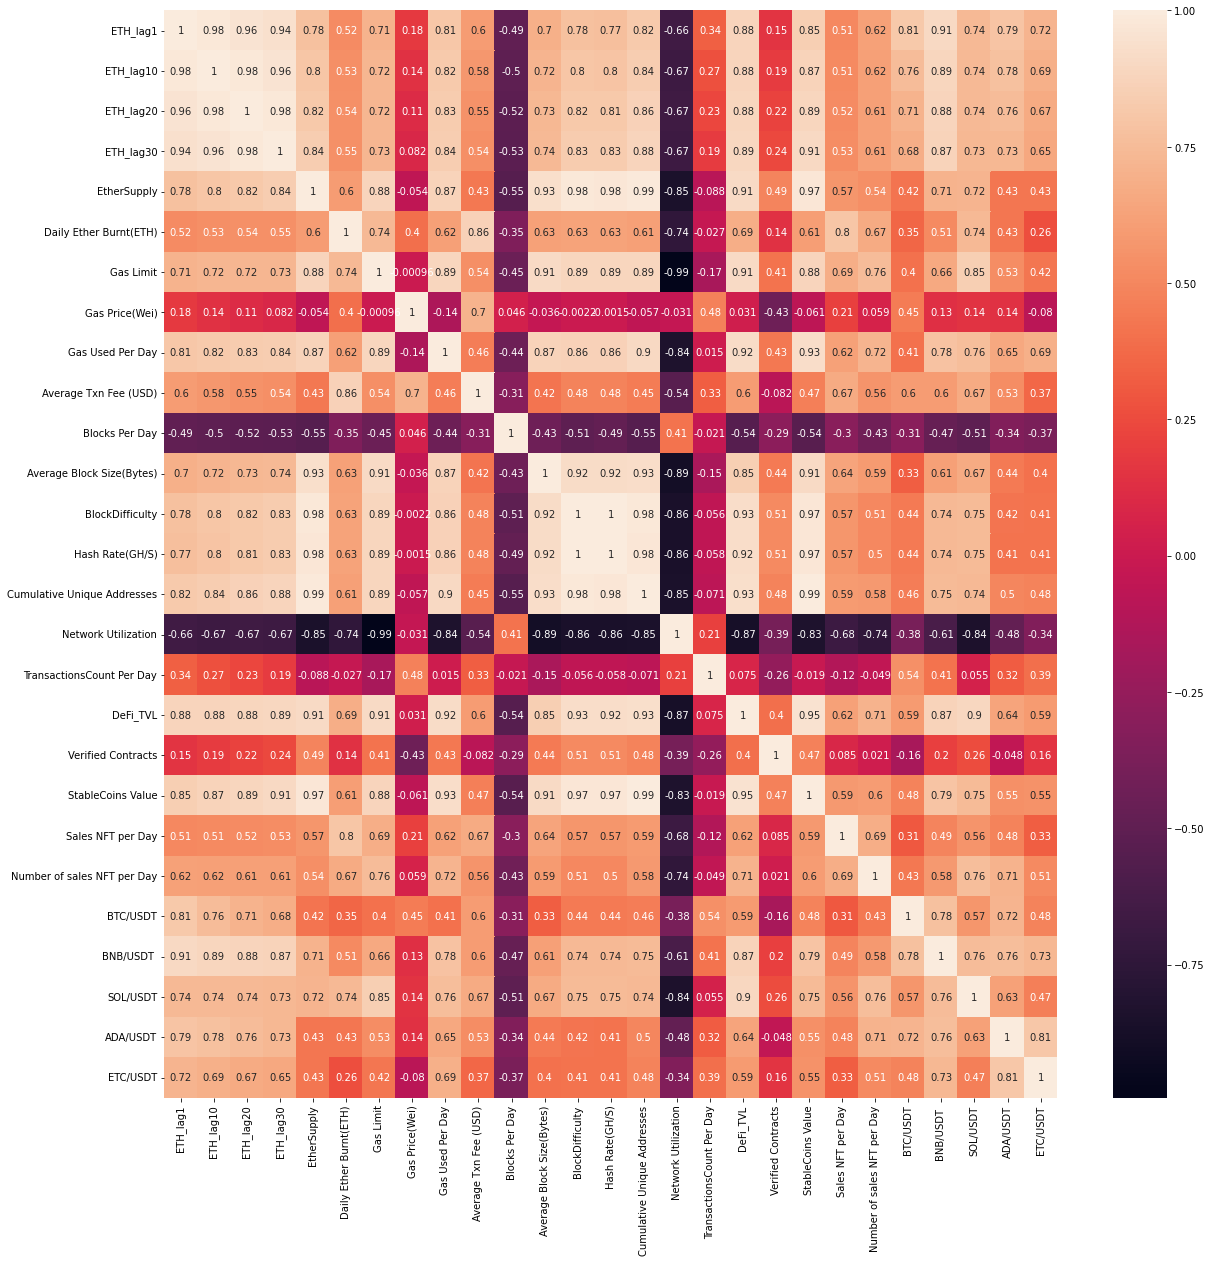

In [6]:
# get table of variable correlations
var_corr = X.corr()
# plot the heatmap
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, annot=True)
plt.show()

## Feature Engineering

1. 我觀察到 Market Cap 和 ETH/USDT 是完全線性關係，所以將其從 X 中剔除，同時 Hash Rate 和 Block Difficulty 也是線性關係，但因為去除其中有可能會導致最後無法解釋，所以暫時留著！
2. 本次重點不是實作 Machine Learning 的部分，是當前的目的可能是要找出變數之間的相關性，預測的精準度可能不會是最大的追求。所以 PCA 和一些解釋性比較弱的特徵工程操作部分我選擇先跳過。
3. 我自己常用的 FE 有 One-hot Encoding、Mean-Encoding、Normalization、Standardization、Scaling、Polynomial Feature、Linear Combination、Ratio Feature。

## Multiple Regression: OLS vs. FGLS

In [7]:
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X.astype(float)).fit()
ori_predictions = model.predict(X) 
 
print_model = model.summary(title="Original OLS Regression Results")
print(print_model)

                       Original OLS Regression Results                        
Dep. Variable:               ETH/USDT   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     2519.
Date:                Fri, 27 May 2022   Prob (F-statistic):               0.00
Time:                        08:24:13   Log-Likelihood:                -3509.7
No. Observations:                 579   AIC:                             7075.
Df Residuals:                     551   BIC:                             7198.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### TS'5 Autocorrelation

Serial correlation，或叫做 autocorrelation，代表變數在資料集之間的相關程度，也就是兩次觀察之間的相似度對它們之間的時間差的函數。常被使用在 time series data 中 observations 有不同的時間點的情況下。像是此報告中我們估計以太幣在一年之中每個月的幣價，如果較近的時間比較遠的時間更雷同，就稱作 correlated。

asym corle.

weak 

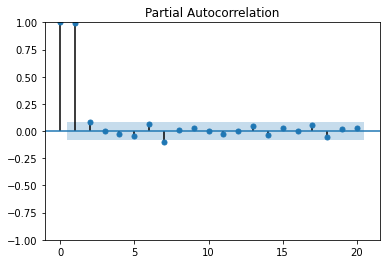

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df["ETH/USDT"], lags=20)

#### Use Durbin-Watson Test
* d = 2 indicates no autocorrelation
* d < 2 indicates positive serial correlation
* d > 2 indicates negative serial correlation

[Durbin-Watson Table](https://www.real-statistics.com/statistics-tables/durbin-watson-table/)
* if d < d_low: reject H0: rho = 0
  * reject the null hypothesis of the test and conclude that  autocorrelation is present.
* d > d_upper: failed to reject H0: rho = 0
* if d_low < d < d_upper: the test is inconclusive


**用上課教的第一個方法比較好**



In [9]:
import statsmodels.stats.diagnostic as dg

print(dg.acorr_breusch_godfrey(model, nlags=3))


(94.58755470641997, 2.264390338315469e-20, 35.68650816114991, 4.441467575871316e-21)


In [10]:
import statsmodels.stats.stattools as sm_tools
d = sm_tools.durbin_watson(model.resid)
print("d: ", d)

d_low = 1.855
d_upper = 1.937

if d < d_low:
  print("reject H0: rho = 0, autocorrelation is present")
elif d > d_low:
  print("failed to reject H0: rho = 0, there is no autocorrelation presented")
else:
  print("the test is inconclusive")

d:  1.4028841970570285
reject H0: rho = 0, autocorrelation is present


### TS'4 Heteroscedasticity
Heteroscedasticity 代表應變數在不同的 level 有不同的散布情形。其中一個驗證方法是透過視覺化的圖查看 OLS model residuals，如果是 homoskedastic 就不會有 residuals pattern。

如果 errors 是 heteroskedastic，變異數可能會有上升或下降的趨勢，例如在比較大的 y_hat 或比較大的 x_j 時變異數會上升。

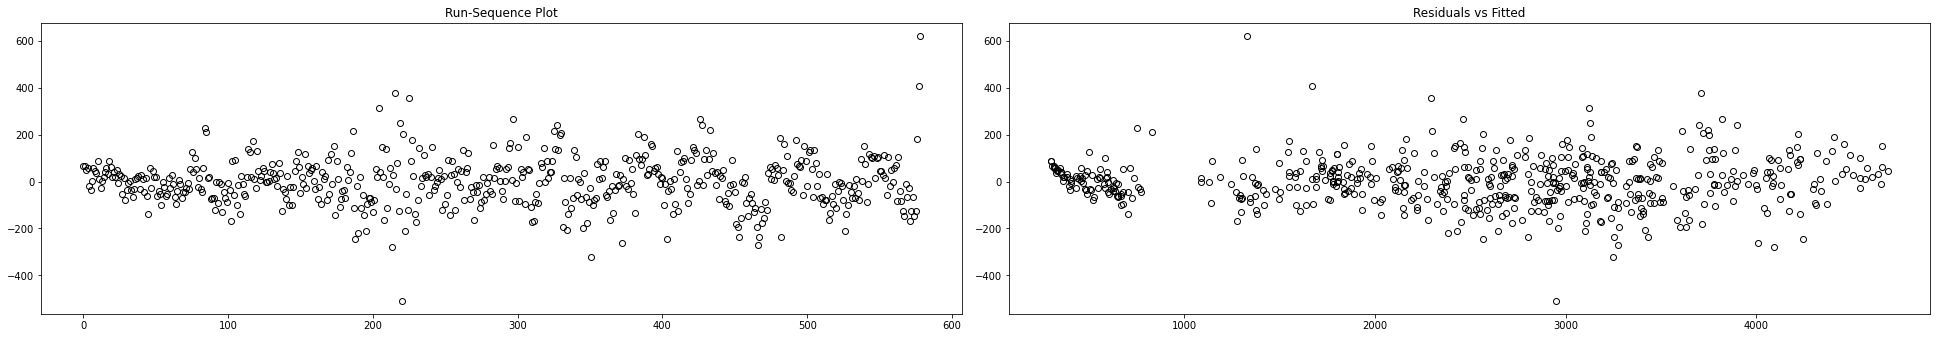

In [11]:
fig = plt.figure(num = 0, figsize = (27, 9))
plot_opts = dict(linestyle = "None", marker = "o", color = "black", markerfacecolor = "None")
_ = fig.add_subplot(2, 2, 1).plot(model.resid, **plot_opts)
_ = plt.title("Run-Sequence Plot")
_ = fig.add_subplot(2, 2, 2).plot(model.fittedvalues, model.resid, **plot_opts)
_ = plt.title("Residuals vs Fitted")
_ = plt.tight_layout()
plt.show()

#### Use Bruesch-Pagan Test

* The null hypothesis (H0): Homoscedasticity is present.
* The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)

In [12]:
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
#perform White's test
breuschpagan_test = het_breuschpagan(model.resid, model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of breuschpagan test
print(dict(zip(labels, breuschpagan_test)))

{'Test Statistic': 178.0210735268372, 'Test Statistic p-value': 9.10528072676407e-24, 'F-Statistic': 9.060198266577352, 'F-Test p-value': 1.2161523288595614e-29}


### Newey-West standard errors for OLS - HAC(Heteroskedasticity and Autocorrelation in regression)

* coeff. 不變   
* std.err 上升
* 有的 variable 變得不顯著



In [13]:
model = sm.OLS(Y, X.astype(float)).fit(cov_type='HAC',cov_kwds={'maxlags':15})
predictions = model.predict(X) 
 
print_model = model.summary(title="Newey-West OLS Regression Results")
print(print_model)

                      Newey-West OLS Regression Results                       
Dep. Variable:               ETH/USDT   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     123.0
Date:                Fri, 27 May 2022   Prob (F-statistic):          1.53e-179
Time:                        08:24:15   Log-Likelihood:                -3509.7
No. Observations:                 579   AIC:                             7075.
Df Residuals:                     551   BIC:                             7198.
Df Model:                          27                                         
Covariance Type:                  HAC                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Feasible GLS - Cochrane-Orcutt Procedure (CORC)

In [14]:
ols_resid = model.resid
resid_fit = sm.OLS(
    np.asarray(ols_resid)[1:], sm.add_constant(np.asarray(ols_resid)[:-1])
).fit()
print(resid_fit.summary())
rho = resid_fit.params[1]

data_exog = sm.add_constant(X)
data_exog = np.array(data_exog, dtype=np.float64)
print("\n\n\n")

from scipy.linalg import toeplitz
order = toeplitz(range(len(ols_resid)))
sigma = rho ** order
gls_model = sm.GLS(Y, np.asarray(data_exog), sigma=sigma)
gls_results = gls_model.fit()
print(gls_results.summary())


print("\n\n\n")
glsar_model = sm.GLSAR(Y, data_exog, 1)
glsar_results = glsar_model.iterative_fit(1)
print(glsar_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     47.53
Date:                Fri, 27 May 2022   Prob (F-statistic):           1.43e-11
Time:                        08:24:15   Log-Likelihood:                -3481.0
No. Observations:                 578   AIC:                             6966.
Df Residuals:                     576   BIC:                             6975.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1889      4.160      0.045      0.9

### Choosing Between HAC and FGLS

If we don't have SE, the OLS will be better since it is consistent.

Trade-off Consistency(Robust, NW Std.err OLS) <-> Efficiency(FGLS)



* HAC:
  * 計算大樣本的 robust standard errors 會有不錯的成效
  * While FGLS offers a theoretical efficiency, it involves making additional assumptions on the error covariance matrix, which may not be easy to test/verify, which may threaten the consistency of the estimator.


* FGLS:
  * 如果解釋變數並非 strictly exogenous，那 FGLS 不僅會 inefficient，還會 inconsistent。
  * in most applications of FGLS, the errors are assumed to follow a first order autoregressive process. It may be better to evaluate OLS estimates and use a robust correction on their standard errors for more general forms of serial correlation;
  * in addition to imposing an assumption of the residual covariance structure in regard to autocorrelation, GLS also requires an exogeneity assumption (MR.3) to hold, unlike HAC.


  Generally, serial correlation is usually encountered in time-series data, which has its own set of models that specifically deal address serial correlation of either the residuals ϵ, the endogenous variable Y, or the exogeneous variables X_j, or even all at once.


It is worth noting that autocorrelated residuals are more frequently the result of a misspecified regression equation, rather than a genuine autocorrelation.

#### Comparison

這邊使用 MAE、MSE、RMSE、R-Square 四個指標以及圖像化來呈現兩種不同演算法的比較結果。

--------------------------------------HAC--------------------------------------
mean_absolute_error: 76.55715362040827
mean_squared_error: 10780.075375726949
rmse: 103.82714180659578
r2 score: 0.991962692915236


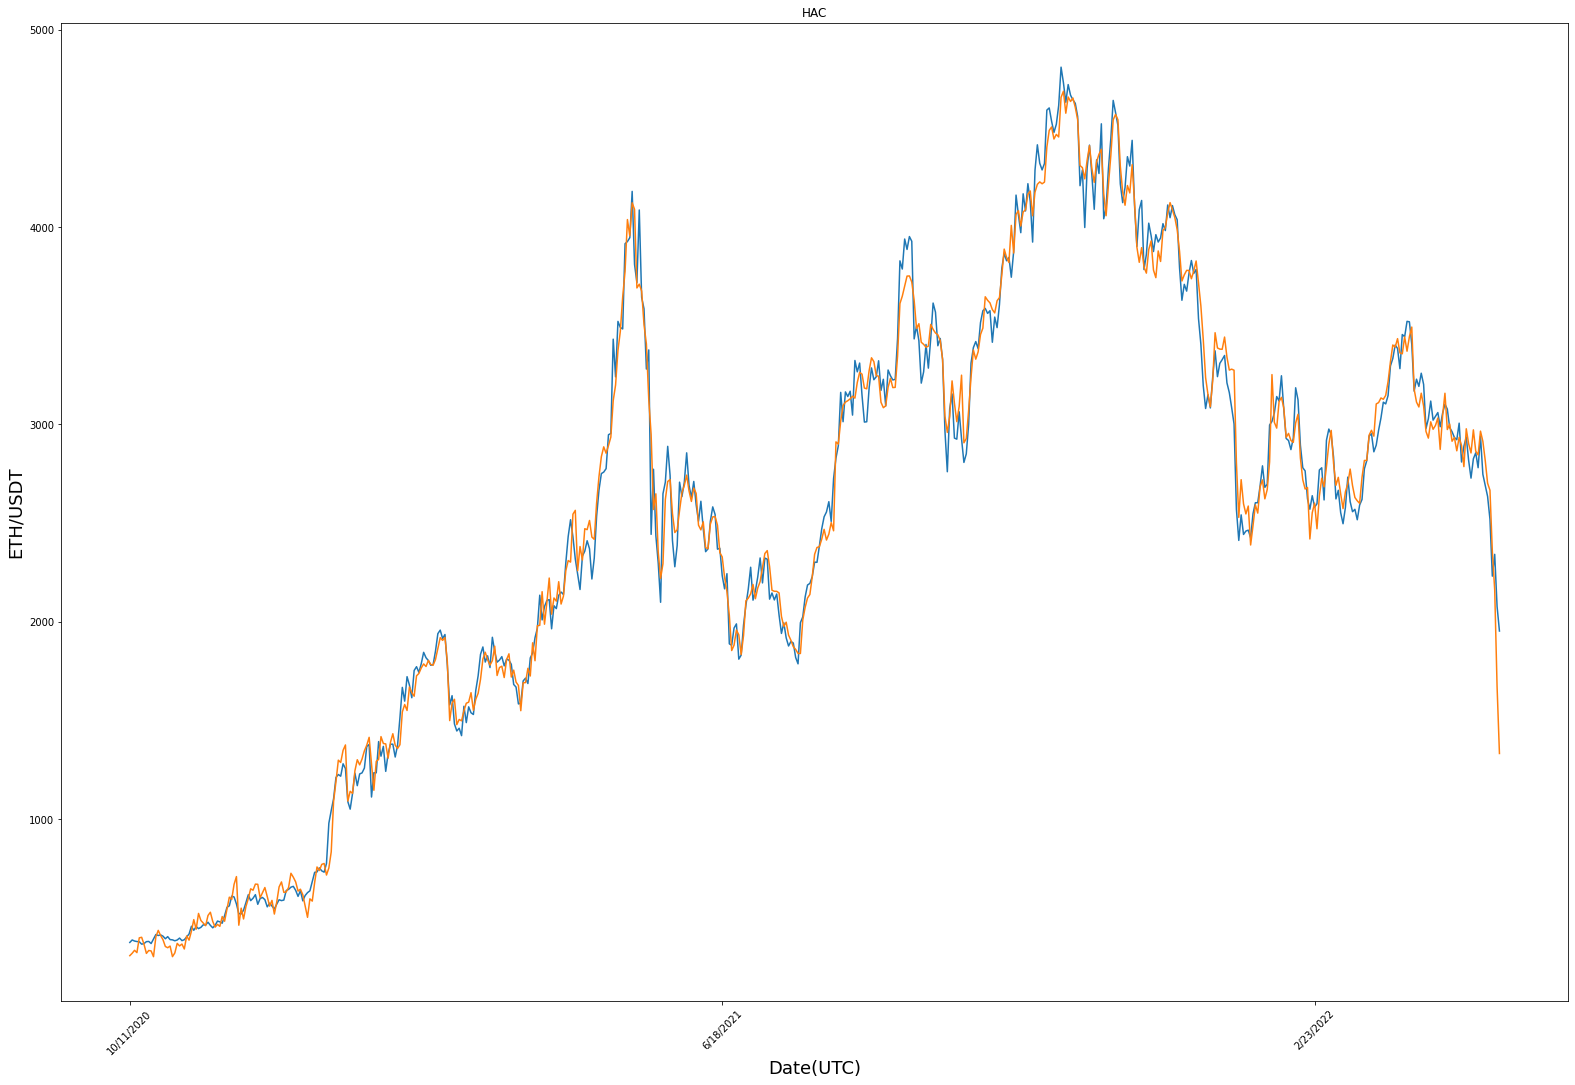

--------------------------------------GLSAR--------------------------------------
mean_absolute_error: 76.6180215595212
mean_squared_error: 10780.419541075365
rmse: 103.82879918921996
r2 score: 0.9919624363156765


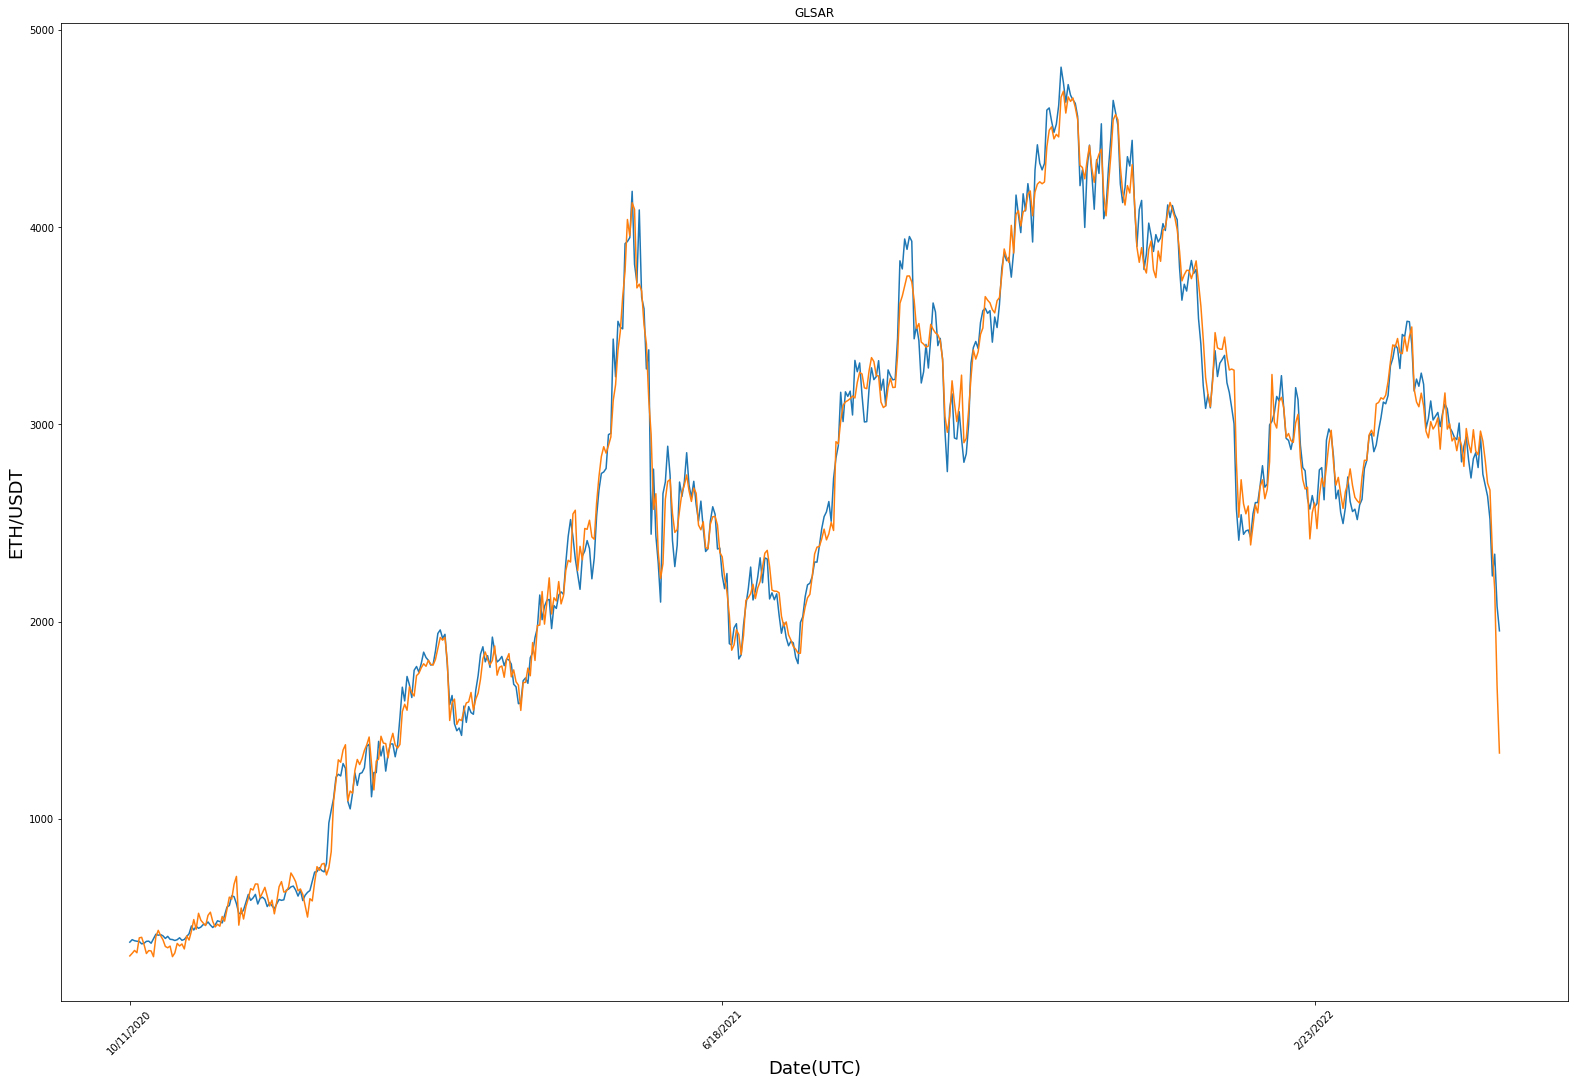

In [15]:
# HAC
print("--------------------------------------HAC--------------------------------------")
print("mean_absolute_error:",mean_absolute_error(Y,predictions))
print("mean_squared_error:",mean_squared_error(Y,predictions))
print("rmse:",sqrt(mean_squared_error(Y,predictions)))
print("r2 score:",r2_score(Y,predictions))
plt.figure(figsize = (27,18))
plt.plot(df['Date(UTC)'], df['ETH/USDT'])
plt.plot(df['Date(UTC)'], predictions)
plt.xticks(range(0,df.shape[0],250),df['Date(UTC)'].loc[::250],rotation=45)
plt.xlabel('Date(UTC)',fontsize=18)
plt.ylabel('ETH/USDT',fontsize=18)
plt.title("HAC")
plt.show()


# FGLS
print("--------------------------------------GLSAR--------------------------------------")
GLSAR_predict = glsar_results.predict()
print("mean_absolute_error:",mean_absolute_error(Y, GLSAR_predict))
print("mean_squared_error:",mean_squared_error(Y, GLSAR_predict))
print("rmse:",sqrt(mean_squared_error(Y, GLSAR_predict)))
print("r2 score:",r2_score(Y, GLSAR_predict))
plt.figure(figsize = (27,18))
plt.plot(df['Date(UTC)'], df['ETH/USDT'])
plt.plot(df['Date(UTC)'], GLSAR_predict)
plt.xticks(range(0,df.shape[0],250),df['Date(UTC)'].loc[::250],rotation=45)
plt.xlabel('Date(UTC)',fontsize=18)
plt.ylabel('ETH/USDT',fontsize=18)
plt.title("GLSAR")
plt.show()

#### Significant Features

使用 P-value 的排序來比較兩種演算法選出來的重要變數是否不同。

In [16]:
pList = [(k,v) for k,v in dict(zip(model.model.exog_names, list(model.pvalues).copy())).items()]
pList.sort(key=lambda x: x[1], reverse=False)
print("----------HAC Important Variable(Ranked by p-value)----------")
for i in pList[:15]:
  print(i[0], round(i[1], 5))

pGList = [(k,v) for k,v in dict(zip(model.model.exog_names, list(glsar_results.pvalues).copy())).items()]
pGList.sort(key=lambda x: x[1], reverse=False)
print("\n\n----------FGLS Important Variable(Ranked by p-value)----------")
for i in pGList[:15]:
  print(i[0], round(i[1], 5))

----------HAC Important Variable(Ranked by p-value)----------
ETH_lag1 0.0
DeFi_TVL 0.0
Average Txn Fee (USD) 0.0
TransactionsCount Per Day 0.0
Gas Price(Wei) 1e-05
Network Utilization 2e-05
Gas Used Per Day 0.0001
Average Block Size(Bytes) 0.0001
Gas Limit 0.00013
ETC/USDT 0.00018
Daily Ether Burnt(ETH) 0.00043
BlockDifficulty 0.00135
Hash Rate(GH/S) 0.0056
const 0.01043
Cumulative Unique Addresses 0.01176


----------FGLS Important Variable(Ranked by p-value)----------
DeFi_TVL 0.0
ETH_lag1 0.0
Average Txn Fee (USD) 0.0
Gas Price(Wei) 0.0
Daily Ether Burnt(ETH) 0.0
TransactionsCount Per Day 0.0
Average Block Size(Bytes) 0.0
ETC/USDT 0.0
Cumulative Unique Addresses 0.00013
BlockDifficulty 0.00021
Network Utilization 0.00038
BNB/USDT  0.00043
Gas Limit 0.00154
Hash Rate(GH/S) 0.00196
Gas Used Per Day 0.0021


## Stationarity
當一個資料集的統計數值，像是 mean, variance 和 autocorrelation 不會隨著時間而改變，就稱作 Stationarity。


大部分 time series datasets 都不是 stationary，因為都會有 non-stationary 的元素存在其中，像是 trends 或 economic cycles。但我們可以用 ‘stationarize’ 的方式來把原始資料轉為我們最後預測模型的素材。


最典型的兩種檢查 Stationarity 的方法就是  Visualization 和 Augmented Dickey-Fuller (ADF) Test.


 > Is the raw data stationary ?
Test statistic = -2.004
P-value = 0.285
Critical values :
	1%: -3.441834071558759 - The data is not stationary with 99% confidence
	5%: -2.8666061267054626 - The data is not stationary with 95% confidence
	10%: -2.569468095872659 - The data is not stationary with 90% confidence


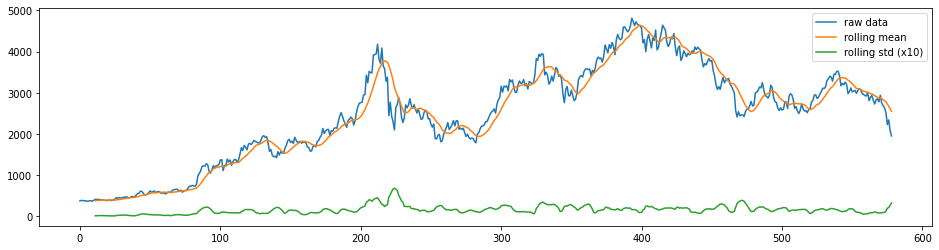

In [17]:
### plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

pd.options.display.float_format = '{:.8f}'.format
test_stationarity(df["ETH/USDT"],'raw data')


# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

ADF_test(df["ETH/USDT"], 'raw data')

In [18]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
train_data = df['ETH/USDT'][:len(df)-100]
test_data = df['ETH/USDT'][len(df)-100:]

from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(train_data, lags=1).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:               ETH/USDT   No. Observations:                  479
Model:                     AutoReg(1)   Log Likelihood               -3029.020
Method:               Conditional MLE   S.D. of innovations            136.718
Date:                Fri, 27 May 2022   AIC                           6064.040
Time:                        08:24:27   BIC                           6076.549
Sample:                             1   HQIC                          6068.958
                                  479                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          25.9737     13.566      1.915      0.056      -0.616      52.563
ETH/USDT.L1     0.9913      0.005    198.276      0.000       0.982       1.001
                                    Roots       

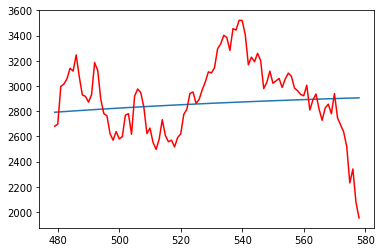

In [20]:
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')

### Make the Data Stationary

 > Is the de-trended data stationary ?
Test statistic = -7.482
P-value = 0.000
Critical values :
	1%: -3.441935806025943 - The data is  stationary with 99% confidence
	5%: -2.8666509204896093 - The data is  stationary with 95% confidence
	10%: -2.5694919649816947 - The data is  stationary with 90% confidence


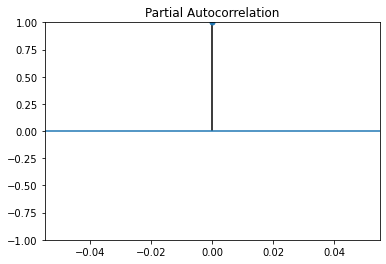

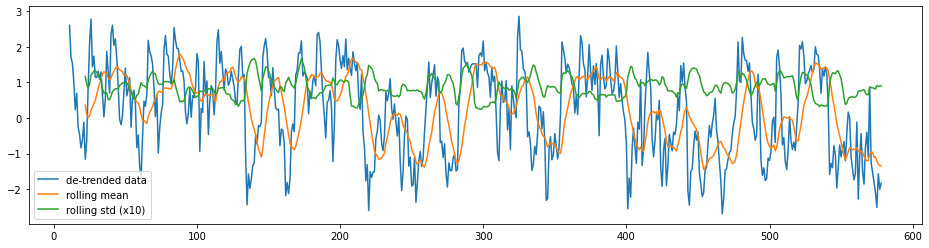

In [21]:
# Detrending
y = df["ETH/USDT"]
y_detrend =  (y - y.rolling(window=12).mean())/y.rolling(window=12).std()

pacf = plot_pacf(y_detrend, lags=20)
test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

### HAC

                      Newey-West OLS Regression Results                       
Dep. Variable:               ETH/USDT   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     11.50
Date:                Fri, 27 May 2022   Prob (F-statistic):           2.22e-28
Time:                        08:24:39   Log-Likelihood:                -708.95
No. Observations:                 579   AIC:                             1474.
Df Residuals:                     551   BIC:                             1596.
Df Model:                          27                                         
Covariance Type:                  HAC                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

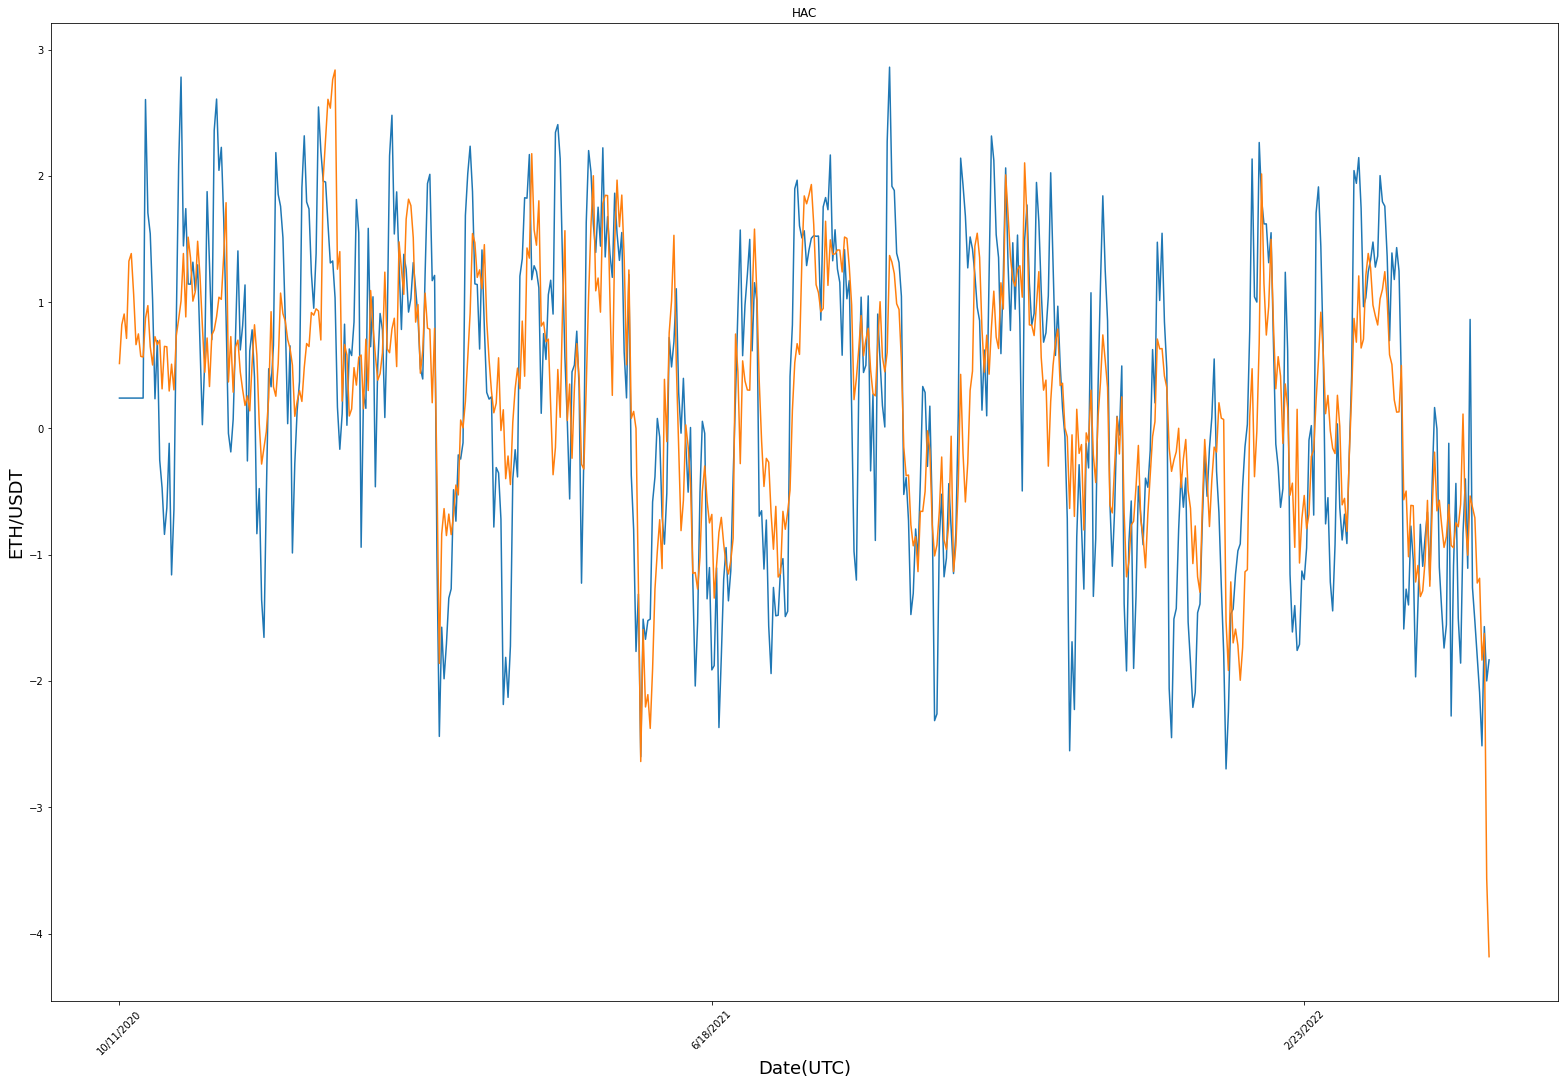

In [23]:
hac = sm.OLS(y_detrend, X.astype(float)).fit(cov_type='HAC',cov_kwds={'maxlags':15})
de_predictions = hac.predict(X)
y_detrend.fillna(value=y_detrend.mean(), inplace=True)

print(hac.summary(title="Newey-West OLS Regression Results"))

print("--------------------------------------Predict--------------------------------------")
print("mean_absolute_error:",mean_absolute_error(Y, de_predictions))
print("mean_squared_error:",mean_squared_error(Y, de_predictions))
print("rmse:",sqrt(mean_squared_error(Y, de_predictions)))
print("r2 score:",r2_score(Y, de_predictions))
plt.figure(figsize = (27,18))
plt.plot(df['Date(UTC)'], y_detrend)
plt.plot(df['Date(UTC)'], de_predictions)
plt.xticks(range(0,df.shape[0],250),df['Date(UTC)'].loc[::250],rotation=45)
plt.xlabel('Date(UTC)',fontsize=18)
plt.ylabel('ETH/USDT',fontsize=18)
plt.title("HAC")
plt.show()

### Autoregressive Moving Average (ARMA)

In [24]:
d = 1 
D = 1 
s = 24 

In [25]:
# set the parameters that give the lowest AIC
p, q, P, Q = [2, 3, 1, 1]

best_model=sm.tsa.statespace.SARIMAX(y_detrend, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                             ETH/USDT   No. Observations:                  579
Model:             SARIMAX(2, 1, 3)x(1, 1, [1], 24)   Log Likelihood                -637.934
Date:                              Fri, 27 May 2022   AIC                           1291.867
Time:                                      08:25:26   BIC                           1326.405
Sample:                                           0   HQIC                          1305.360
                                              - 579                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2029      0.046     -4.386      0.000      -0.294      -0.112
ar.L2          0.79

In [26]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

    plt.figure(figsize=(27, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual")
    plt.xticks(range(0,df.shape[0],150),df['Date(UTC)'].loc[::150],rotation=45)
    plt.legend()
    plt.grid(True);

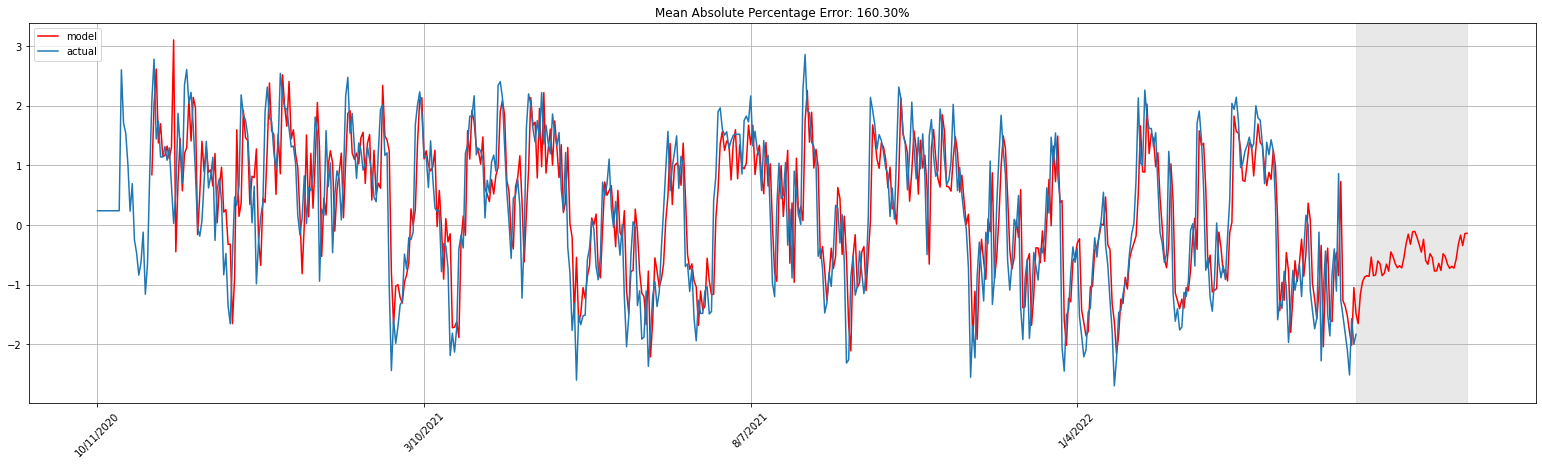

In [27]:
new_df = pd.DataFrame({"ETH/USDT": y_detrend})
plotSARIMA(new_df, best_model, 50)

# Before

In [28]:
X = df0[['ETH_lag1', 'ETH_lag10', 'ETH_lag20', 'ETH_lag30', 'EtherSupply', 'Daily Ether Burnt(ETH)', 'Gas Limit',
       'Gas Price(Wei)', 'Gas Used Per Day', 'Average Txn Fee (USD)',
       'Blocks Per Day', 'Average Block Size(Bytes)', 'BlockDifficulty',
       'Hash Rate(GH/S)', 'Cumulative Unique Addresses', 'Network Utilization',
       'TransactionsCount Per Day', 'DeFi_TVL', 'Verified Contracts',
       'StableCoins Value', 'Sales NFT per Day', 'Number of sales NFT per Day',
        'NASDAQ', 'BTC/USDT', 'BNB/USDT ', 'SOL/USDT', 'ADA/USDT', 'ETC/USDT']]
Y = df0['ETH/USDT']

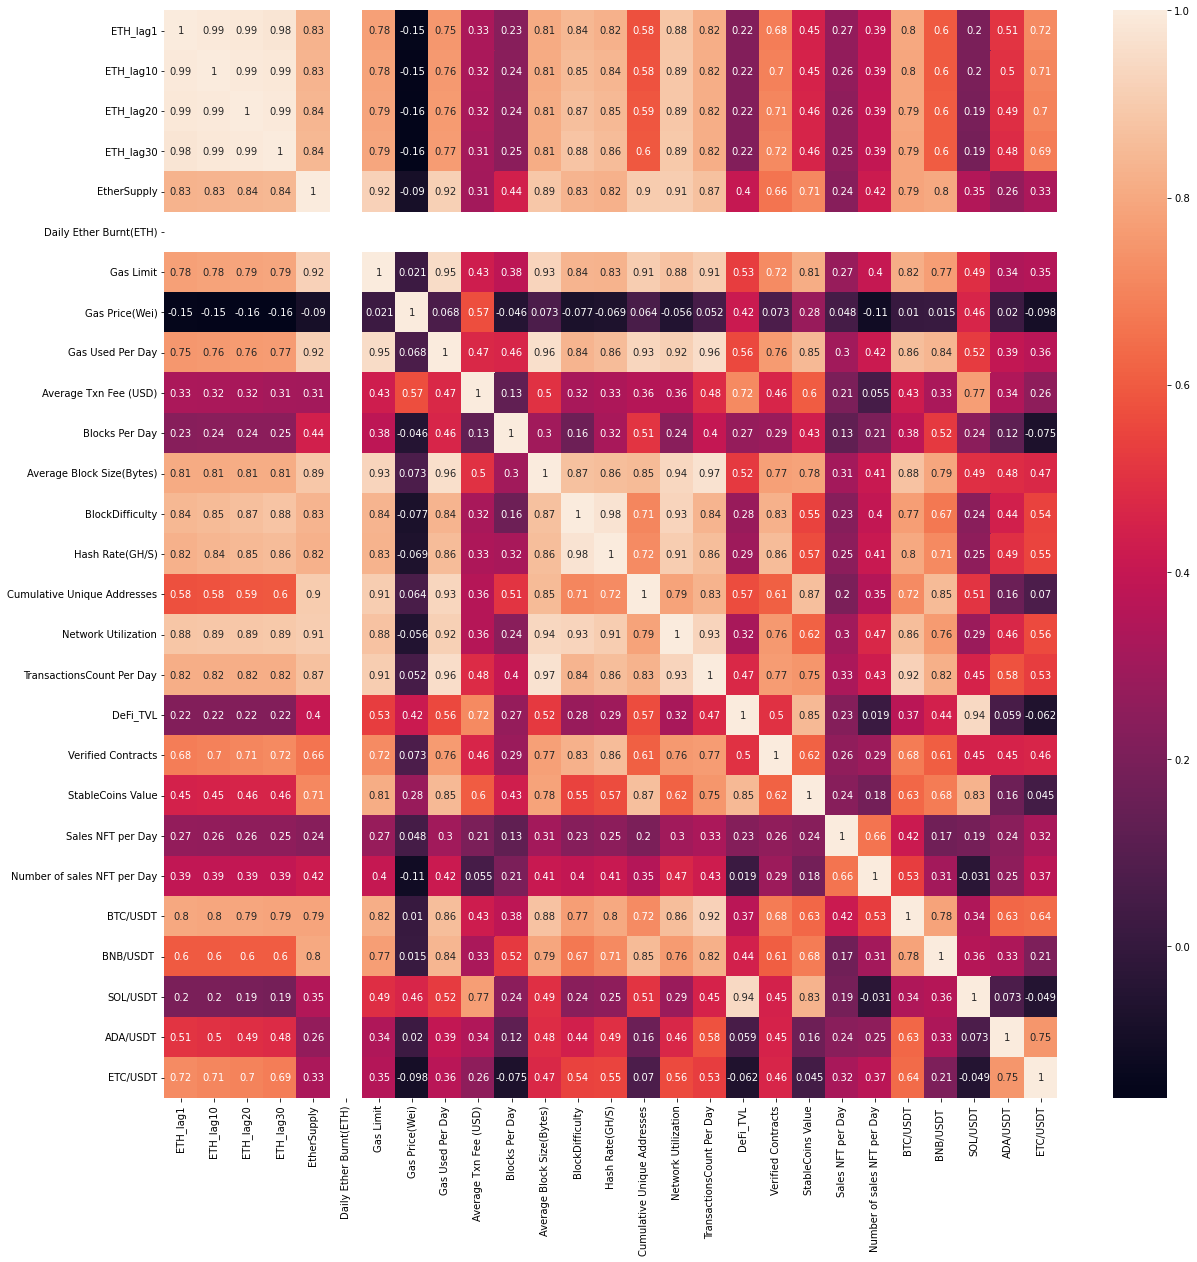

In [29]:
## Ts'2
# get table of variable correlations
var_corr = X.corr()
# plot the heatmap
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, annot=True)
plt.show()

In [30]:
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X.astype(float)).fit()
ori_predictions = model.predict(X) 
 
print_model = model.summary(title="Original OLS Regression Results")
print(print_model)

                       Original OLS Regression Results                        
Dep. Variable:               ETH/USDT   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     1798.
Date:                Fri, 27 May 2022   Prob (F-statistic):               0.00
Time:                        08:25:30   Log-Likelihood:                -9862.8
No. Observations:                1900   AIC:                         1.978e+04
Df Residuals:                    1872   BIC:                         1.994e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

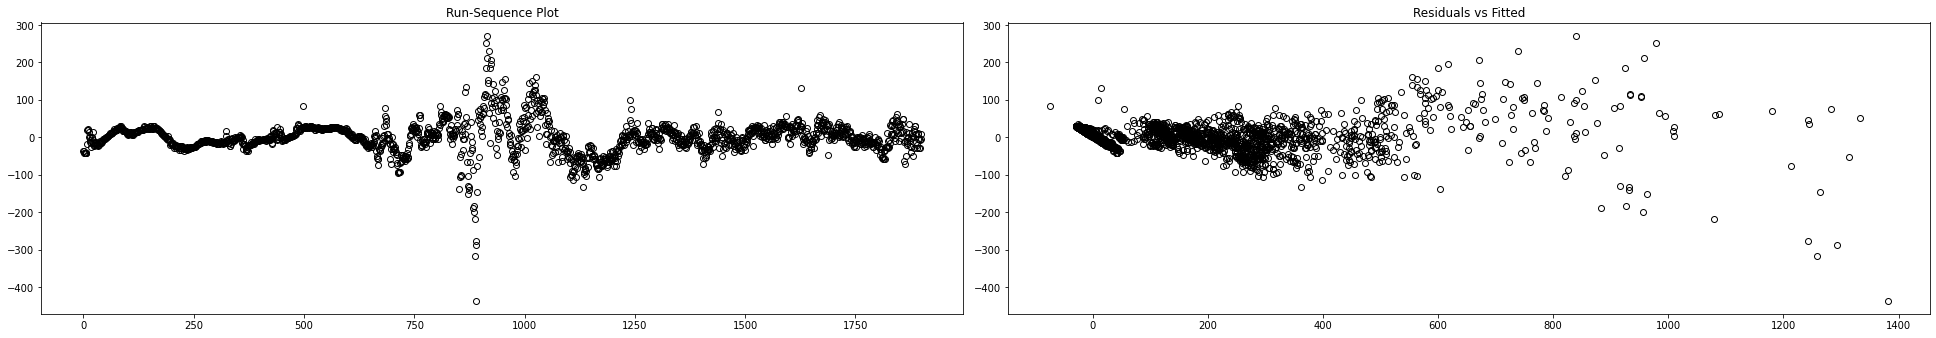

{'Test Statistic': 809.9343949325128, 'Test Statistic p-value': 1.7429785670807692e-152, 'F-Statistic': 51.51566210412712, 'F-Test p-value': 2.9386000119926127e-203}


In [31]:

## Ts'4
fig = plt.figure(num = 0, figsize = (27, 9))
plot_opts = dict(linestyle = "None", marker = "o", color = "black", markerfacecolor = "None")
_ = fig.add_subplot(2, 2, 1).plot(model.resid, **plot_opts)
_ = plt.title("Run-Sequence Plot")
_ = fig.add_subplot(2, 2, 2).plot(model.fittedvalues, model.resid, **plot_opts)
_ = plt.title("Residuals vs Fitted")
_ = plt.tight_layout()
plt.show()

#perform White's test
breuschpagan_test = het_breuschpagan(model.resid, model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of breuschpagan test
print(dict(zip(labels, breuschpagan_test)))

d:  0.3007162245187493
reject H0: rho = 0, autocorrelation is present


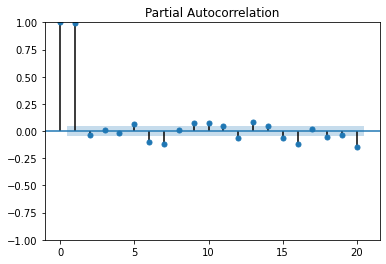

In [32]:
## Ts'5
pacf = plot_pacf(df0["ETH/USDT"], lags=20)


d = sm_tools.durbin_watson(model.resid)
print("d: ", d)

d_low = 1.855
d_upper = 1.937

if d < d_low:
  print("reject H0: rho = 0, autocorrelation is present")
elif d > d_low:
  print("failed to reject H0: rho = 0, there is no autocorrelation presented")
else:
  print("the test is inconclusive")

In [33]:
model = sm.OLS(Y, X.astype(float)).fit(cov_type='HAC',cov_kwds={'maxlags':15})
predictions = model.predict(X) 
 
print_model = model.summary(title="Newey-West OLS Regression Results")
print(print_model)

                      Newey-West OLS Regression Results                       
Dep. Variable:               ETH/USDT   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     84.36
Date:                Fri, 27 May 2022   Prob (F-statistic):          7.97e-235
Time:                        08:25:31   Log-Likelihood:                -9862.8
No. Observations:                1900   AIC:                         1.978e+04
Df Residuals:                    1872   BIC:                         1.994e+04
Df Model:                          27                                         
Covariance Type:                  HAC                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [34]:
print("----------After Important Variable(Ranked by p-value)----------")
for i in pList[:15]:
  print(i[0], round(i[1], 5))

pList = [(k,v) for k,v in dict(zip(model.model.exog_names, list(model.pvalues).copy())).items()]
pList.sort(key=lambda x: x[1], reverse=False)
print("----------Before Important Variable(Ranked by p-value)----------")
for i in pList[:15]:
  print(i[0], round(i[1], 5))


----------After Important Variable(Ranked by p-value)----------
ETH_lag1 0.0
DeFi_TVL 0.0
Average Txn Fee (USD) 0.0
TransactionsCount Per Day 0.0
Gas Price(Wei) 1e-05
Network Utilization 2e-05
Gas Used Per Day 0.0001
Average Block Size(Bytes) 0.0001
Gas Limit 0.00013
ETC/USDT 0.00018
Daily Ether Burnt(ETH) 0.00043
BlockDifficulty 0.00135
Hash Rate(GH/S) 0.0056
const 0.01043
Cumulative Unique Addresses 0.01176
----------Before Important Variable(Ranked by p-value)----------
ETC/USDT 0.0
const 0.0
EtherSupply 2e-05
ADA/USDT 0.00017
TransactionsCount Per Day 0.00278
Daily Ether Burnt(ETH) 0.00832
StableCoins Value 0.03714
Sales NFT per Day 0.04152
Verified Contracts 0.0443
BNB/USDT  0.04467
ETH_lag1 0.05019
Average Txn Fee (USD) 0.05036
BlockDifficulty 0.07527
Gas Limit 0.07972
Network Utilization 0.08262


# 🍩 Tipsy


## Conclusion



## Reference

* [BLOCK EXPLORERS](https://ethereum.org/en/developers/docs/data-and-analytics/block-explorers/)
* [DATA AND ANALYTICS](https://ethereum.org/en/developers/docs/data-and-analytics/)
* [On Inflation, Transaction Fees and Cryptocurrency Monetary Policy](https://blog.ethereum.org/2016/07/27/inflation-transaction-fees-cryptocurrency-monetary-policy/?fbclid=IwAR3B_0O7r9rZ5EQYmPbygaAzzOl2frlasrZEGf1EyCiK17PitaFNjwuVWHo)

### Data Collected From

* [Etherscan](https://etherscan.io/)
* [Defi Llama](https://defillama.com/)
* [Nonfungible](http://nonfungible.com/market-tracker)
* [Coingecko](https://www.coingecko.com/)
* [Coinresources](https://www.coinresources.io/)
* [Tokenterminal](https://tokenterminal.com/terminal/projects/ethereum?gclid=Cj0KCQjwg_iTBhDrARIsAD3Ib5i1QEtc99avjBe6yiFA34VNyupvKTelw-G6gQBCI4P1PPiH8Ts_hSMaAqj-EALw_wcB)
* [blockchain.com](https://www.blockchain.com/charts)

### Time Series in Python
* [Time Series Analysis in Python – A Comprehensive Guide with Examples](https://www.machinelearningplus.com/time-series/time-series-analysis-python/)
* [Topic 9. Part 1. Time series analysis in Python](https://www.kaggle.com/code/kashnitsky/topic-9-part-1-time-series-analysis-in-python/notebook#Econometric-approach)
* [A Guide to Time Series Forecasting in Python](https://builtin.com/data-science/time-series-forecasting-python)
* [Forecasting with a Time Series Model using Python: Part One](https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one/)
* [Multiple Linear Regression](https://www.codecademy.com/learn/linear-regression-mssp/modules/multiple-linear-regression-mssp/cheatsheet)
* [4.8 Autocorrelated (Serially Correlated) Errors](http://web.vu.lt/mif/a.buteikis/wp-content/uploads/PE_Book/4-8-Multiple-autocorrelation.html)

### Time Series in R
* [A Guide to Time Series Forecasting in R You Should Know](https://www.simplilearn.com/tutorials/data-science-tutorial/time-series-forecasting-in-r)
* [Exploring Four Simple Time Series Forecasting Methods with R Examples](https://www.mssqltips.com/sqlservertip/6778/time-series-forecasting-methods-with-r-examples/)
* [R Statistics - Time Series Forecasting](http://r-statistics.co/Time-Series-Forecasting-With-R.html)
* [Quick-R - Time Series and Forecasting](https://www.statmethods.net/advstats/timeseries.html)
* [Forcasting-A-Time-Series-Stock-Market-Data](https://stat-wizards.github.io/Forcasting-A-Time-Series-Stock-Market-Data/)
* [A Complete Tutorial on Time Series Modeling in R](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/)
* [Understanding Time Series with R](https://www.kdnuggets.com/2020/07/understanding-time-series-r.html)

### Evaluating ETH Price
* [The fair value of a token: How do markets price cryptocurrencies?](https://www.sciencedirect.com/science/article/pii/S0275531919300601)
* [Ethereum Valuation](https://www.macroaxis.com/valuation/ETH.CC/Ethereum)
* [Quantifying Blockchain Extractable Value:How dark is the forest?](https://arxiv.org/pdf/2101.05511.pdf)

# ❗ Problems Now

1. 怎麼知道是 x 導致 y 而不是 y 導致 x
2. Stationary 的 Data 的用途
3. 要怎麼知道 error term 有 time trend
4. 預測效果非常差，感覺是錯的